In [1]:
import sys
sys.path.append('../src/cifar10')
sys.path.append('../src')

In [2]:
from cifar10_original_moe_training import *
from original_moe_training import *

/nobackup/projects/bdrap03/yamuna/miniconda/envs/mnn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
Files already downloaded and verified
device cuda:0


In [3]:
from helper.collect_results import *

device cuda:0


In [4]:
# Paths to where the trained models and figures will be stored. You can change this as you see fit.
fig_path = '../figures/cifar10'
model_path = '../models/cifar10'
results_path = '../results/cifar10'

if not os.path.exists(fig_path):
    os.mkdir(fig_path)
if not os.path.exists(model_path):
    os.mkdir(model_path)
if not os.path.exists(results_path):
    os.mkdir(results_path)        

In [5]:
#Function to display the images
def plot_colour_images(images_to_plot, titles=None, nrows=None, ncols=6, thefigsize=(18,18)):
    # images_to_plot: list of images to be displayed
    # titles: list of titles corresponding to the images
    # ncols: The number of images per row to display. The number of rows 
    #        is computed from the number of images to display and the ncols
    # theFigsize: The size of the layour of all the displayed images
    
    n_images = images_to_plot.shape[0]
    
    # Compute the number of rows
    if nrows is None:
        nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()
    
    for i in range(n_images):
        img = images_to_plot[i,:,:,:]
        npimg = np.clip(img.numpy(),0,1)
        ax[i].imshow(npimg)
        ax[i].axis('off')  
        if titles is not None and i<10:
            ax[i].set_title(titles[i%10])

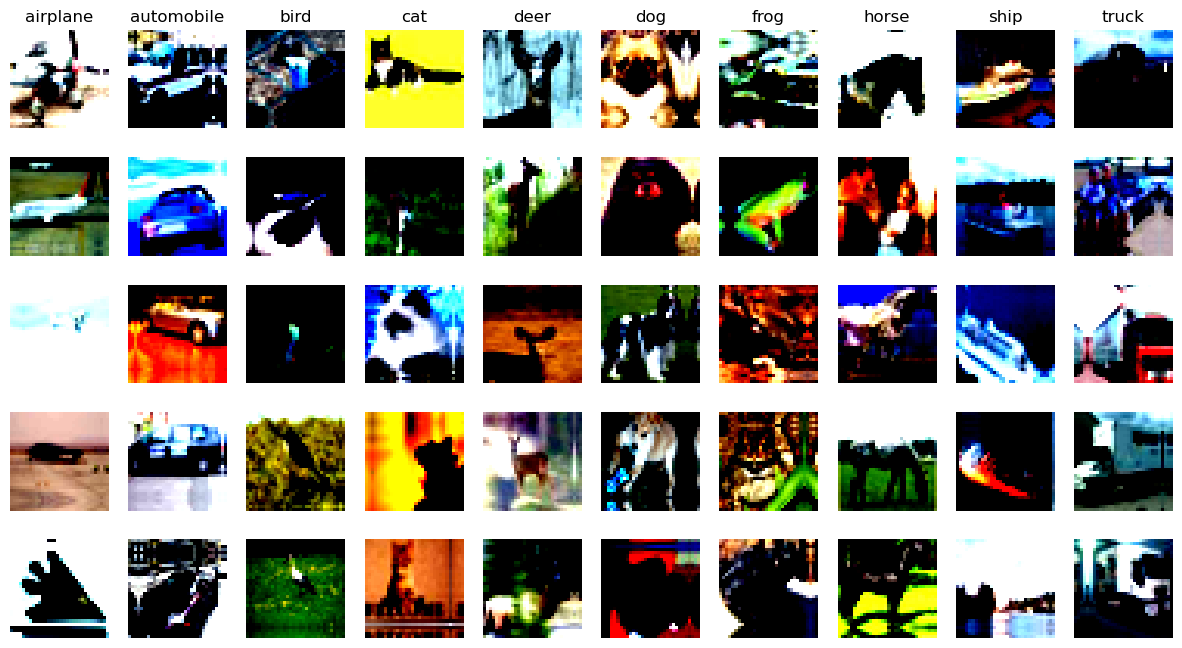

In [6]:
# get some random training images
dataiter = iter(cifar10_trainloader)
images, labels = dataiter.next()

images_to_plot = []
for i in range(0, len(classes_cifar10)):
    # pick images of each class
    index = np.where(labels==i)[0]
    if i == 0:
        images_to_plot.append(images[index[0:5],:,:])
    else:
        images_to_plot.append(images[index[0:5],:,:])
images_to_plot = torch.transpose(torch.stack(images_to_plot),0,1)
new_shape = images_to_plot.shape
images_to_plot = images_to_plot.reshape(new_shape[0]*new_shape[1], new_shape[2], new_shape[3], new_shape[4])
images_to_plot = images_to_plot.permute(0,2,3,1)

plot_colour_images(images_to_plot, nrows=5, ncols=10,thefigsize=(15,8), titles=classes_cifar10)
    


In [14]:
filename = 'cifar10_top_k_results_5.csv'

In [15]:
total_experts = 5
num_classes = 10
num_epochs = 200

In [9]:
m = 'cifar10_single_model'
collect_single_result(m, num_classes, num_epochs, testloader=cifar10_testloader, 
                      model_path=model_path, results_path=results_path, filename=filename)

In [16]:
m = 'cifar10_rand_init_top_1'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [17]:
m = 'cifar10_rand_init_top_2'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [18]:
m = 'cifar10_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [19]:
m = 'cifar10_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [20]:
m = 'cifar10_with_attention_rand_init_top_1'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [21]:
m = 'cifar10_with_attention_rand_init_top_2'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [22]:
m = 'cifar10_with_attention_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [23]:
m = 'cifar10_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [24]:
m = 'cifar10_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [25]:
m = 'cifar10_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [26]:
m = 'cifar10_with_attn_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [27]:
m = 'cifar10_with_attn_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

FileNotFoundError: [Errno 2] No such file or directory: '../models/cifar10/cifar10_with_attn_rand_init_top_2_importance_1.0_10_5_models.pt'

In [ ]:
m = 'cifar10_loss_gate_rand_init'
collect_loss_gate_results(m, 'moe_expert_loss_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attention_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attention_rand_init_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attention_rand_init_top_2'
collect_results(m, 'moe_top_k_model', k=2, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_with_attn_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'cifar10_no_gate_entropy_argmax_no_gate_T_10.0'
collect_results(m, 'moe_no_gate_entropy_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_no_gate_self_information'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_no_gate_self_information_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [ ]:
m = 'new_cifar10_no_gate_self_information_top_2'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=cifar10_testloader, model_path=model_path, results_path=results_path, filename=filename)

In [16]:
import pandas as pd
filename = os.path.join(results_path, 'cifar10_top_k_results.csv')
data = pd.read_csv(filename)

In [17]:
final_results_filename = os.path.join(results_path,'cifar10_top_k_final_results.csv')

In [36]:
models = ['cifar10_rand_init_10', 'cifar10_with_attention_rand_init',
          'cifar10_rand_init_top_1', 'cifar10_with_attention_rand_init_top_1',
          'cifar10_rand_init_top_2', 'cifar10_with_attention_rand_init_top_2',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_loss_gate_rand_init',
          ]
header = True
df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    series = model_data.mean(numeric_only=True)
    row = pd.DataFrame([series.values], columns=series.index)
    row['train error'] = (1-row['train error'])*100
    row['test error'] = (1-row['test error'])*100
    row.insert(2, 'test error std', std[index])
    row.insert(0, 'filename' , model_data['filename'].iloc[0])
    if df is None:
        df = row
    else:
        df = pd.concat([df, row])
header = ['filename', 'train error', 'test error', 'test error std', 'mutual information', 'sample entropy', 'experts usage']
    
df.to_csv(final_results_filename,mode='a',header=header, index=False, float_format='%.3f')


In [18]:
models = ['cifar10_rand_init_10', 'cifar10_with_attention_rand_init_10',
          'cifar10_stochastic_rand_init', 'cifar10_with_attn_stochastic_rand_init', 
          'cifar10_rand_init_top_1_10', 'cifar10_with_attention_rand_init_top_1_10',
          'cifar10_rand_init_top_2_10', 'cifar10_with_attention_rand_init_top_2_10',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_no_gate_entropy_argmax_no_gate_T_10', 'new_cifar10_no_gate_self_information_10',
          'new_cifar10_no_gate_self_information_top_1', 'new_cifar10_no_gate_self_information_top_2',
           'cifar10_loss_gate_rand_init',
          'new_cifar10_with_attention_rand_init_10','new_cifar10_with_attn_stochastic_rand_init',
          'new_cifar10_with_attention_rand_init_top_1', 'new_cifar10_with_attention_rand_init_top_2',         
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [23]:
models = ['cifar10_rand_init_10', 'cifar10_with_attention_rand_init_10',
          'cifar10_rand_init_top_1_10', 'cifar10_with_attention_rand_init_top_1_10',
          'cifar10_rand_init_top_2_10', 'cifar10_with_attention_rand_init_top_2_10',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_no_gate_entropy_argmax_no_gate_T_10', 'new_cifar10_no_gate_self_information_10',
          'new_cifar10_no_gate_self_information_top_1', 'new_cifar10_no_gate_self_information_top_2',
           'cifar10_loss_gate_rand_init',
          'new_cifar10_with_attention_rand_init_top_1', 'new_cifar10_with_attention_rand_init_top_2',
          'new_cifar10_with_attn_stochastic_rand_init',
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          ]

header = True
# df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
# print('data', data)
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    row = pd.DataFrame(model_data.values, columns=model_data.columns)
    row = model_data.loc[[model_data['val error'].idxmin()]]
    row['val error'] = (1-row['val error'])*100
    row['test error'] = (1-row['test error'])*100   
    row.insert(3, 'test error std', std[index])
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [ ]:
models = ['cifar10_rand_init_10', 'cifar10_with_attention_rand_init_10',
          'cifar10_rand_init_top_1_10', 'cifar10_with_attention_rand_init_top_1_10',
          'cifar10_rand_init_top_2_10', 'cifar10_with_attention_rand_init_top_2_10',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_no_gate_entropy_argmax_no_gate_T_10', 'new_cifar10_no_gate_self_information_10',
          'new_cifar10_no_gate_self_information_top_1', 'new_cifar10_no_gate_self_information_top_2',
           'cifar10_loss_gate_rand_init',
          'new_cifar10_with_attention_rand_init_top_1', 'new_cifar10_with_attention_rand_init_top_2',
          'new_cifar10_with_attn_stochastic_rand_init',
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        best_model = model_data.loc[[model_data['val error'].idxmin()]]['filename'].values[0]
        
        model_data = model_data.loc[data['filename'] == best_model]
        print(model_data)
        
        series = model_data.mean(numeric_only=True)
        row = pd.DataFrame([series.values], columns=series.index)
        row.insert(0, 'filename', best_model)
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [19]:
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

filename  val error  test error  \
0                   cifar10_rand_init_10_10_models.pt     68.311      71.709   
1    cifar10_with_attention_rand_init_10_10_models.pt     60.859      64.854   
2        cifar10_stochastic_rand_init_10_10_models.pt     70.205      72.236   
3   cifar10_with_attn_stochastic_rand_init_10_10_m...     83.066      85.918   
4             cifar10_rand_init_top_1_10_10_models.pt     64.404      66.455   
5   cifar10_with_attention_rand_init_top_1_10_10_m...     62.139      64.326   
6             cifar10_rand_init_top_2_10_10_models.pt     74.678      77.598   
7   cifar10_with_attention_rand_init_top_2_10_10_m...     85.430      86.572   
8    cifar10_rand_init_importance_0.6_10_10_models.pt     79.531      81.475   
9   cifar10_with_attn_rand_init_importance_1.0_10_...     78.730      80.225   
10  cifar10_rand_init_top_2_importance_0.4_10_10_m...     79.277      82.031   
11  cifar10_with_attn_rand_init_top_2_importance_0...     86.279      86.797   
12  cifar10_no_gate_entropy_argmax_no_gate_T_10.0_...     70.791      73.350   
13  new_cifar10_no_gate_self_information_10_10_mod...     83.779      87.871   
14  new_cifar10_no_gate_self_information_top_1_10_...     73.936      76.611   
15  new_cifar10_no_gate_self_information_top_2_10_...     84.541      86.436   
16        cifar10_loss_gate_rand_init_10_10_models.pt     65.596      68.398   
17  new_cifar10_with_attention_rand_init_10_10_mod...     61.387      63.740   
18  new_cifar10_with_attn_stochastic_rand_init_10_...     85.605      87.441   
19  new_cifar10_with_attention_rand_init_top_1_10_...     62.187      64.268   
20  new_cifar10_with_attention_rand_init_top_2_10_...     81.943      82.627   
21  new_cifar10_with_attn_rand_init_importance_1.0...     85.088      85.635   
22  new_cifar10_with_attn_rand_init_top_2_importan...     86.484      86.914   

    mutual information  sample entropy  experts usage  per_task_entropy  \
0                1.839           0.161          1.867             0.705   
1                0.000           0.000          0.000             0.000   
2                1.367           0.000          1.395             0.326   
3                3.180           0.000          3.310             0.895   
4                0.969           0.050          0.991             0.372   
5                0.000           0.000          0.000             0.000   
6                1.710           0.146          1.731             0.466   
7                2.944           0.171          3.247             0.992   
8                3.304           0.256          3.304             1.182   
9                3.319           0.032          3.319             1.172   
10               3.311           0.370          3.310             1.299   
11               3.229           0.146          3.317             0.938   
12               0.659           2.846          3.163             3.070   
13               3.320           0.100          3.320             0.820   
14               3.309           0.000          3.309             1.315   
15               3.033           0.144          3.113             0.931   
16               0.000           0.000          0.000             0.000   
17               0.000           0.000          0.000             0.000   
18               3.262           0.000          3.321             0.815   
19               0.000           0.000          0.000             0.000   
20               2.704           0.133          3.136             0.933   
21               3.317           0.033          3.317             0.915   
22               3.282           0.099          3.318             0.865   

    val error std  
0           0.018  
1           0.105  
2           0.013  
3           0.061  
4           0.034  
5           0.076  
6           0.021  
7           0.006  
8           0.026  
9           0.032  
10          0.132  
11          0.009  
12          0.006  
13          0.003  
14          0.018  
15 

In [10]:
import pandas as pd
filename = os.path.join(results_path, 'cifar10_top_k_results_5.csv')
data = pd.read_csv(filename)

In [11]:
final_results_filename = os.path.join(results_path,'cifar10_top_k_final_results_5.csv')

In [12]:
models = ['cifar10_single_model',
          'cifar10_rand_init_10', 'cifar10_with_attention_rand_init_10',
          'cifar10_stochastic_rand_init', 'cifar10_with_attn_stochastic_rand_init', 
          'cifar10_rand_init_top_1_10', 'cifar10_with_attention_rand_init_top_1_10',
          'cifar10_rand_init_top_2_10', 'cifar10_with_attention_rand_init_top_2_10',
          'cifar10_rand_init_importance', 'cifar10_with_attn_rand_init_importance',
          'cifar10_rand_init_top_2_importance', 'cifar10_with_attn_rand_init_top_2_importance',
          'cifar10_no_gate_entropy_argmax_no_gate_T_10', 'new_cifar10_no_gate_self_information_10',
          'new_cifar10_no_gate_self_information_top_1', 'new_cifar10_no_gate_self_information_top_2',
           'cifar10_loss_gate_rand_init',
          'new_cifar10_with_attention_rand_init_10','new_cifar10_with_attn_stochastic_rand_init',
          'new_cifar10_with_attention_rand_init_top_1', 'new_cifar10_with_attention_rand_init_top_2',         
          'new_cifar10_with_attn_rand_init_importance', 'new_cifar10_with_attn_rand_init_top_2_importance',
          ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [13]:
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

filename  val error  test error mutual information  \
0  cifar10_single_model     40.225      42.744                 NA   

  sample entropy experts usage per_task_entropy  val error std  
0             NA            NA               NA          0.011

Train Accuracy 0.000
Max Validation Accuracy 1.000
Min Validation Error 0.000
Mutual Information 3.322
Sample Entropy 0.000
Expert Usage 3.322


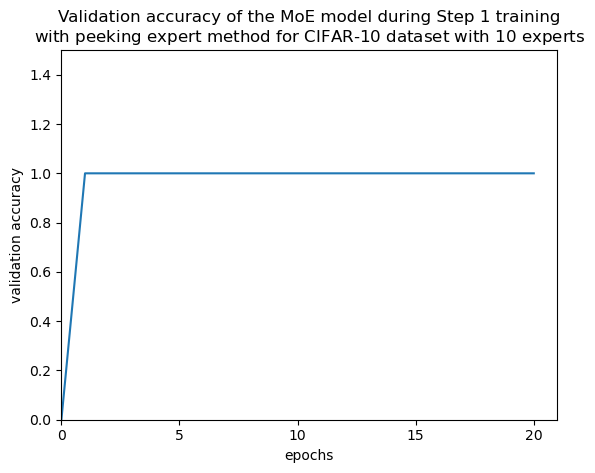

In [10]:
m = 'cifar10_no_gate_self_information'

total_experts = 10
classes = range(num_classes)
num_epochs = 20
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0.0]

model, model_file, best_model_index = find_best_model(m, temps=temps, 
                                                      w_importance_range=w_importance_range,
                                                      num_classes=num_classes, total_experts=total_experts, 
                                                      num_epochs=num_epochs, model_path=model_path, device=device)
val_accuracy = torch.tensor([torch.zeros(1)]+model['moe_no_gate_self_information_model']['experts'][total_experts]['history']['val_accuracy']).cpu()[0:21]
sns.lineplot(x=range(num_epochs+1), y=val_accuracy)
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.xlim([0, num_epochs+1])
plt.ylim([0, max(val_accuracy)+0.5])
plt.xticks(range(0,num_epochs+1,5))
plt.title('Validation accuracy of the MoE model during Step 1 training\nwith peeking expert method for CIFAR-10 dataset with $10$ experts')
plot_file = model_file.replace('models.pt', 'step_1_training.png')
plt.savefig(os.path.join(fig_path, plot_file))

Train Accuracy 0.000
Max Validation Accuracy 1.000
Min Validation Error 0.000
Mutual Information 3.322
Sample Entropy 0.000
Expert Usage 3.322
Best model index 0
cifar10_no_gate_self_information_10_10_models.pt


<Figure size 640x480 with 0 Axes>

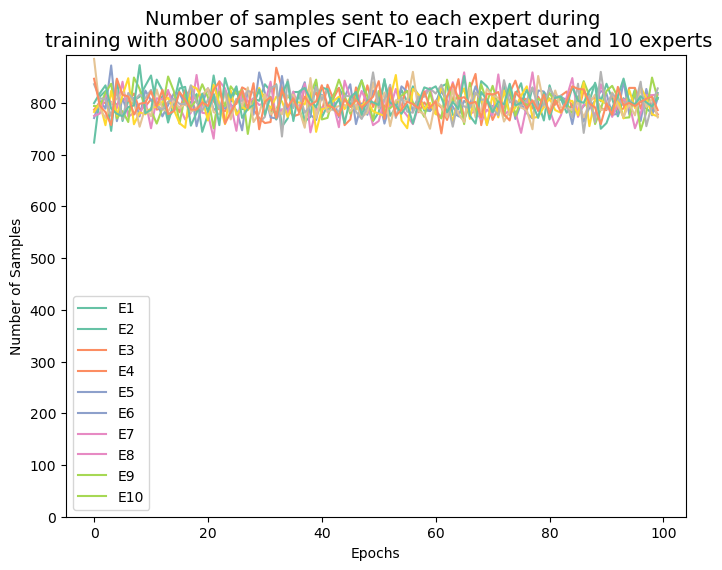

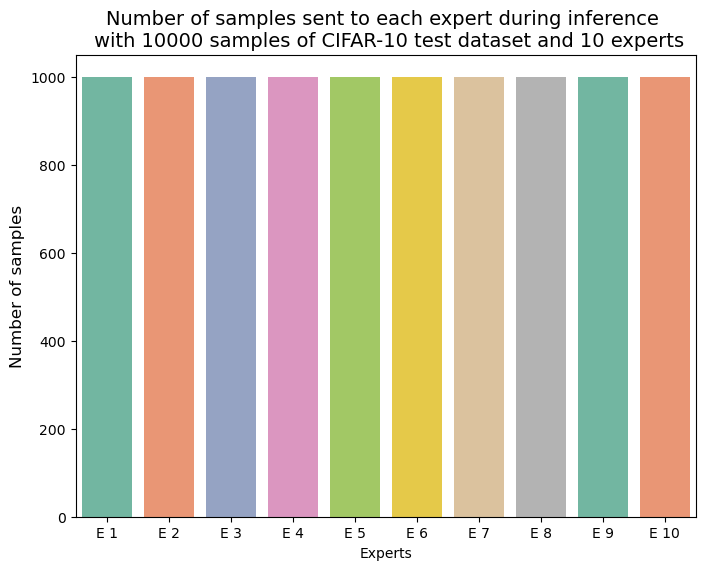

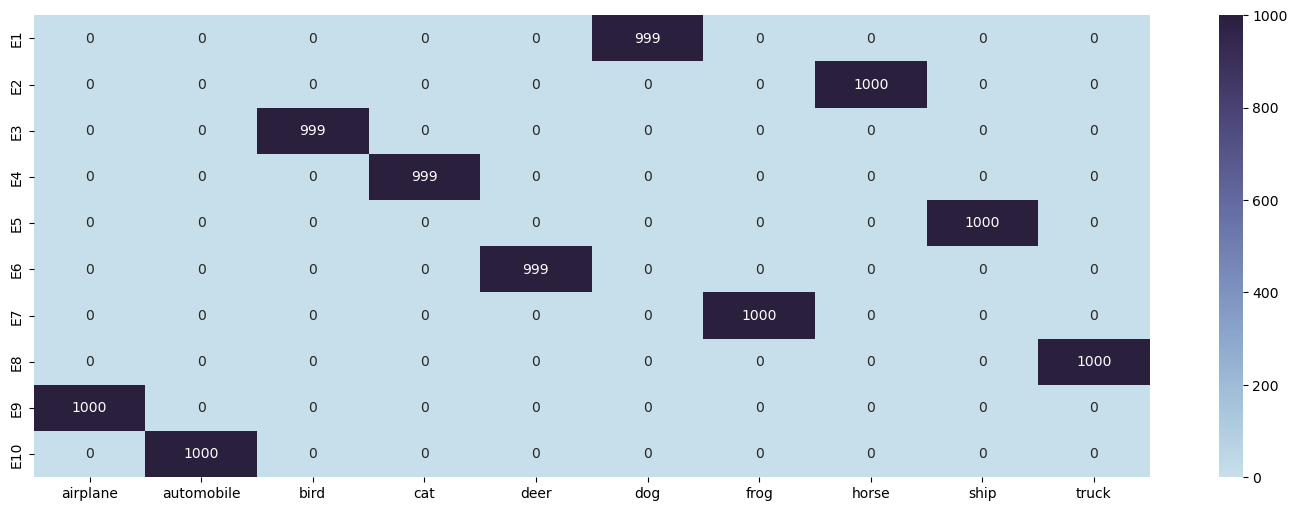

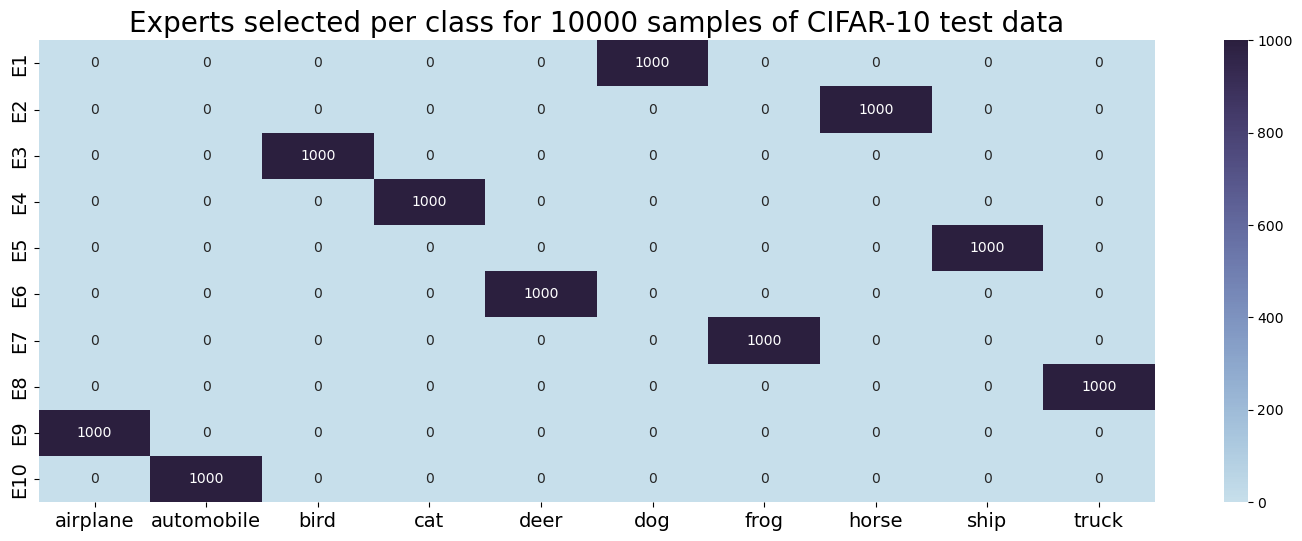

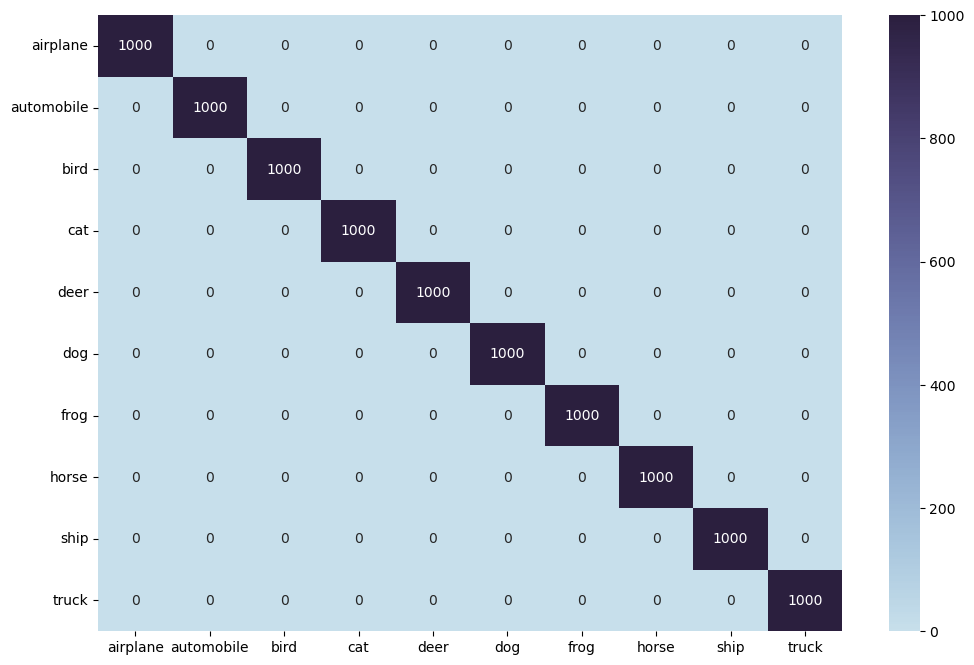

In [11]:
m = 'cifar10_no_gate_self_information'

total_experts = 10
classes = classes_cifar10
num_epochs = 100
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0.0]

plot_expert_usage(m, 'moe_no_gate_self_information_model', test_loader=test_loader, temps=temps,
                  w_importance_range=w_importance_range, 
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, 
                  dataset='CIFAR-10',  device=device)


Train Accuracy 0.037
Max Validation Accuracy 0.955
Min Validation Error 0.045
Mutual Information 2.246
Sample Entropy 0.000
Expert Usage 2.246
Best model index 4
cifar10_no_gate_self_information_10_5_models.pt


<Figure size 640x480 with 0 Axes>

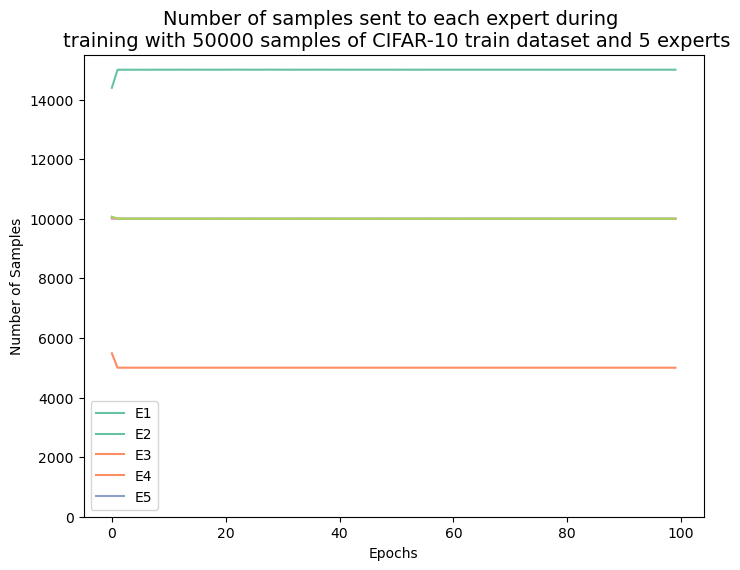

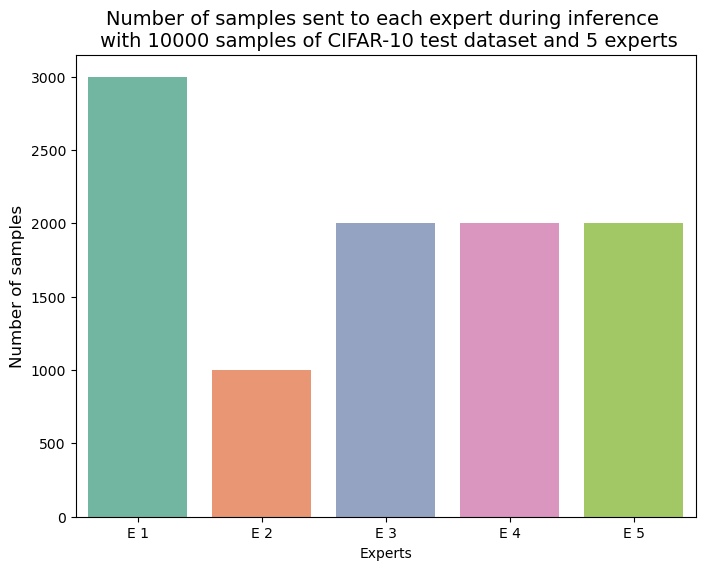

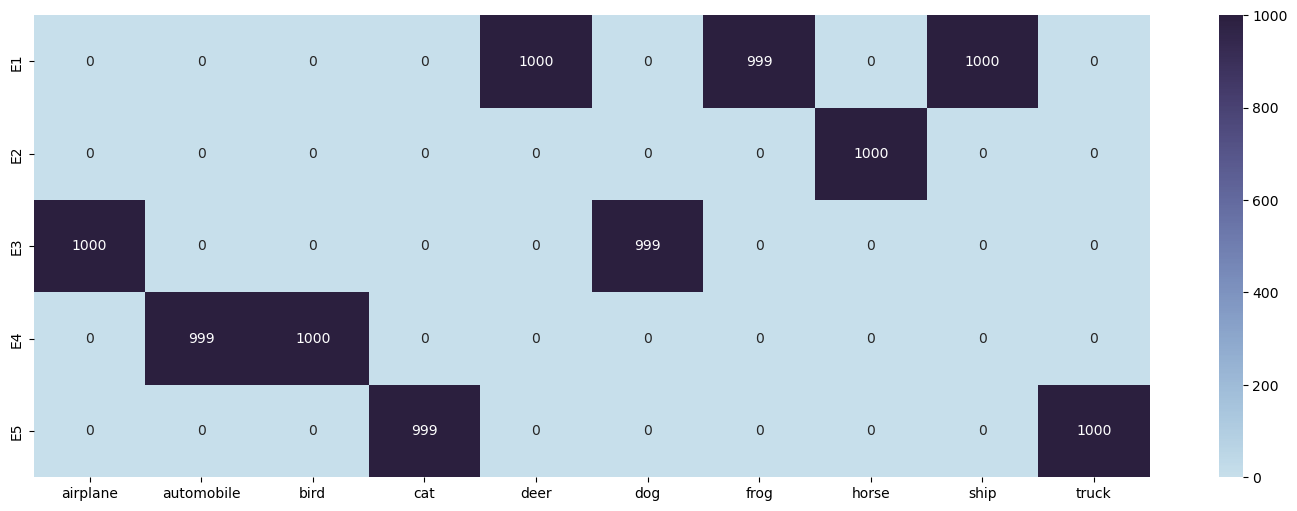

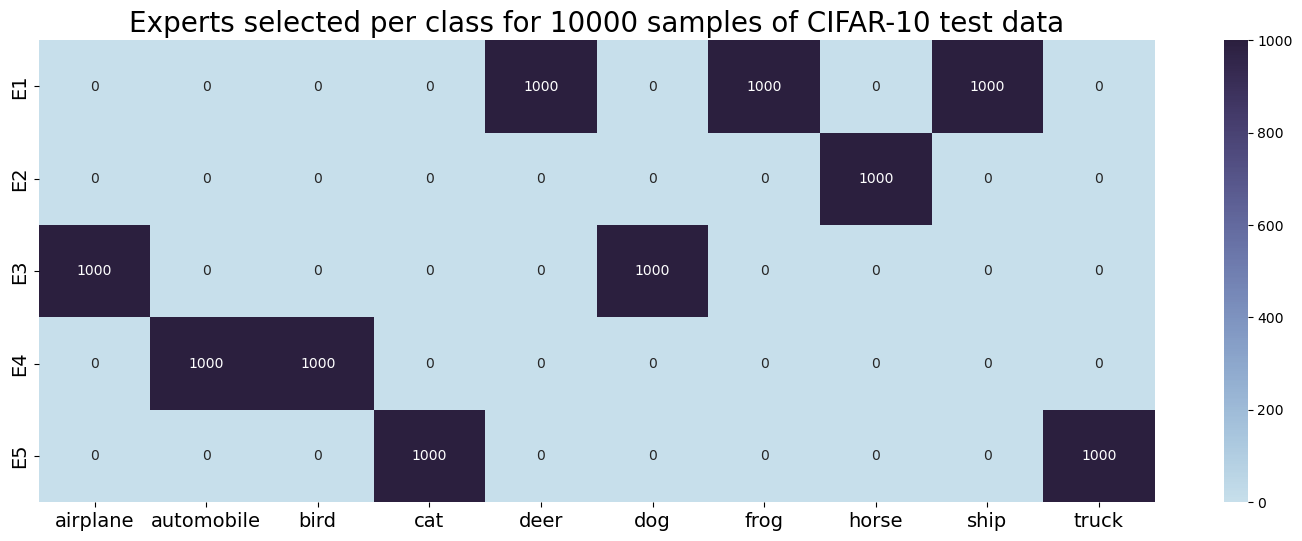

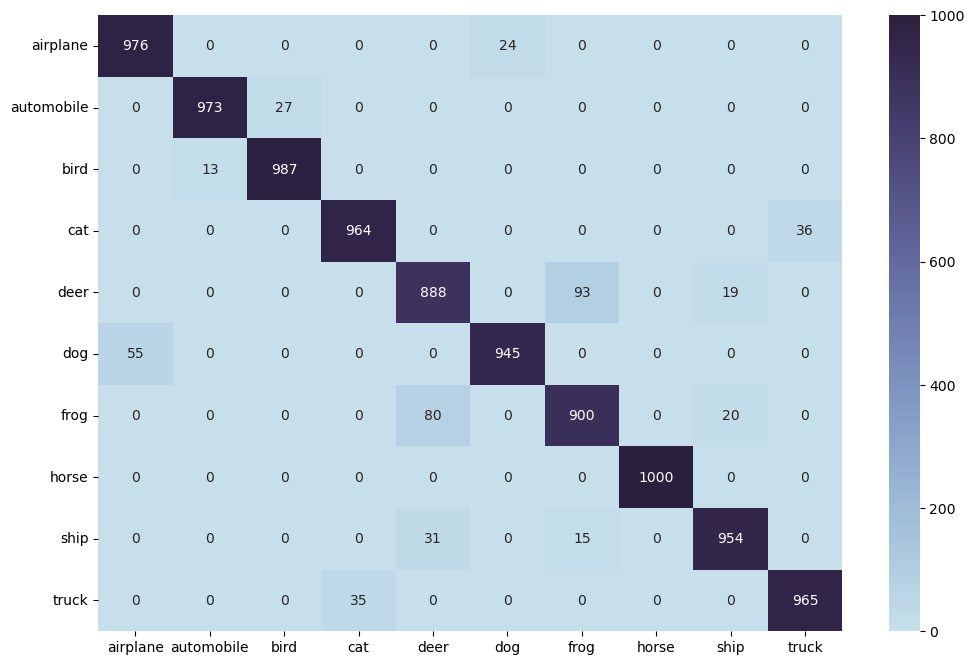

In [12]:
m = 'cifar10_no_gate_self_information'

total_experts = 5
classes = classes_cifar10
num_epochs = 100
temps = [[1.0]*num_epochs]
test_loader = cifar10_testloader

w_importance_range = [0.0]

plot_expert_usage(m, 'moe_no_gate_self_information_model', test_loader=test_loader, temps=temps,
                  w_importance_range=w_importance_range, 
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, 
                  dataset='CIFAR-10',  device=device)


Train Accuracy 0.263
Max Validation Accuracy 0.708
Min Validation Error 0.292
Mutual Information 0.597
Sample Entropy 2.866
Expert Usage 2.734
Best model index 7
cifar10_no_gate_entropy_argmax_no_gate_T_10.0_10_10_models.pt


<Figure size 640x480 with 0 Axes>

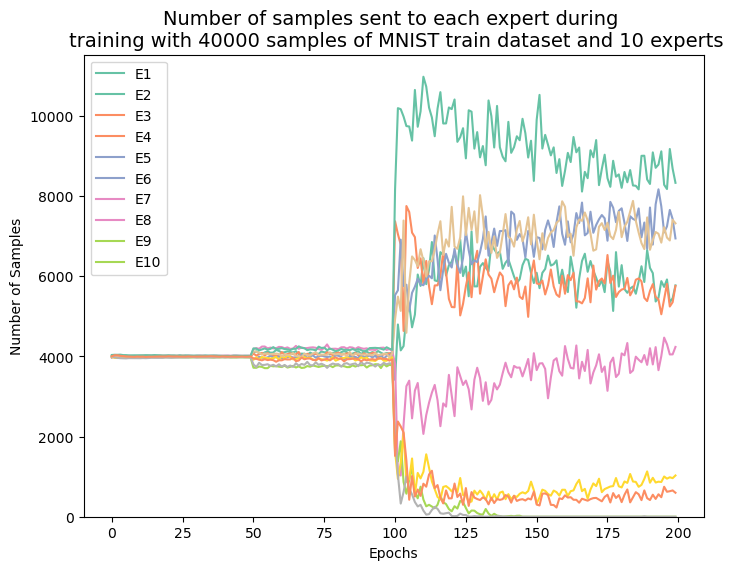

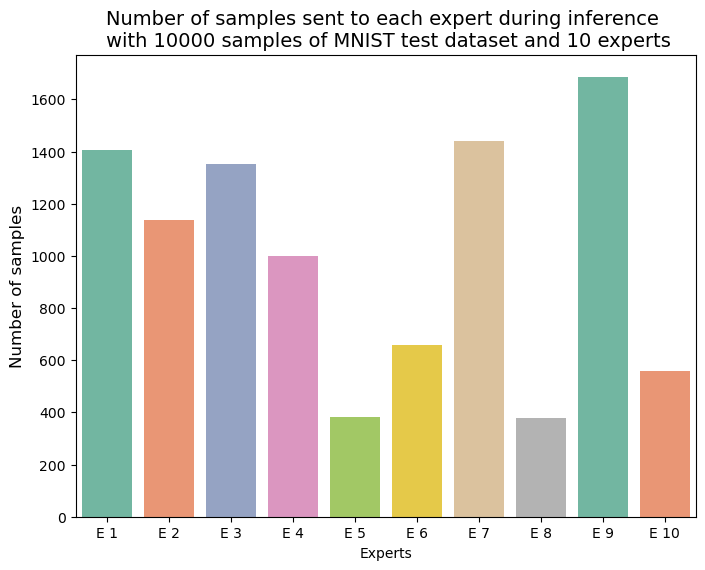

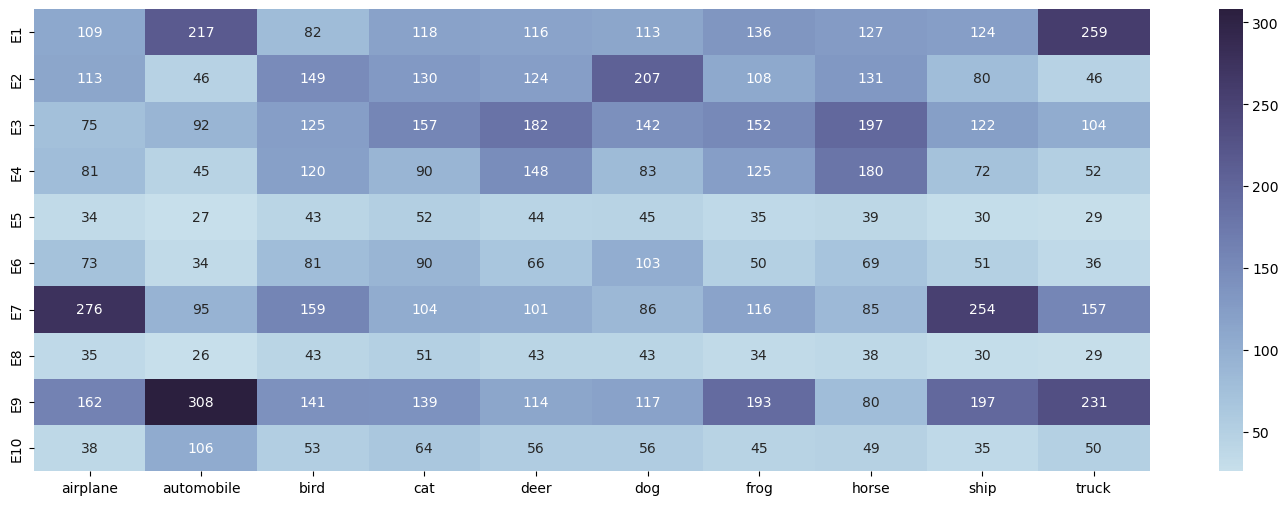

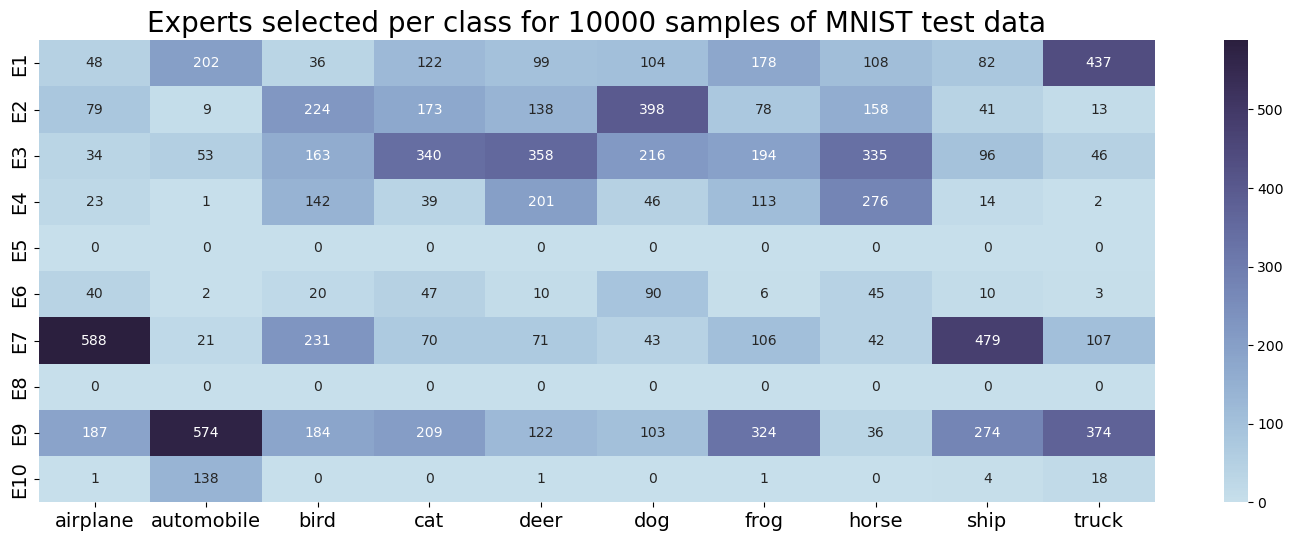

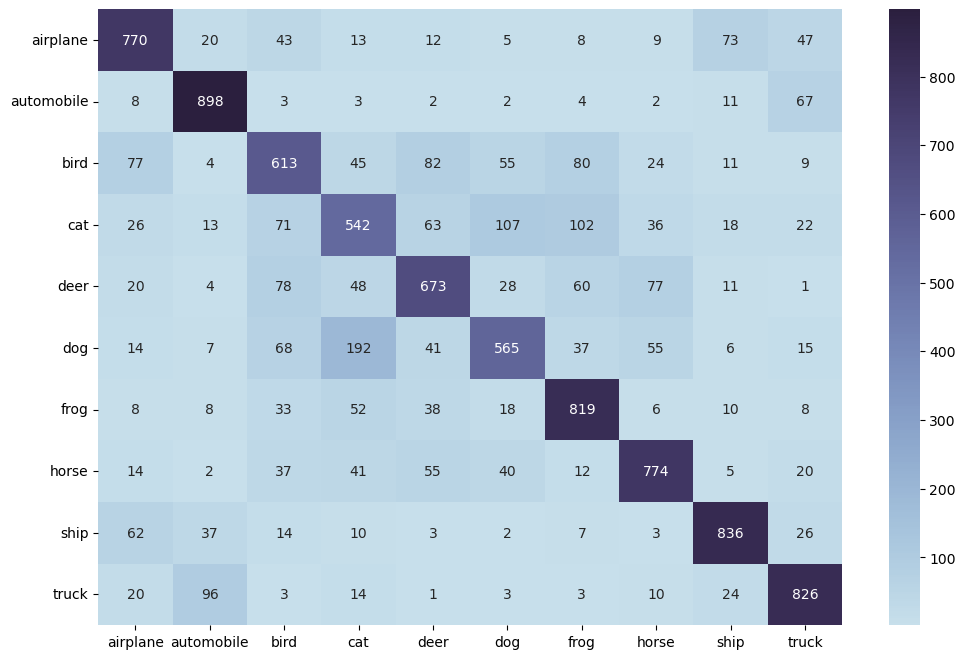

In [13]:
m = 'cifar10_no_gate_entropy_argmax_no_gate_T_10.0'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, 'moe_no_gate_self_information_model', test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.365
Max Validation Accuracy 0.619
Min Validation Error 0.381
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 7
cifar10_with_attention_rand_init_10_5_models.pt


<Figure size 640x480 with 0 Axes>

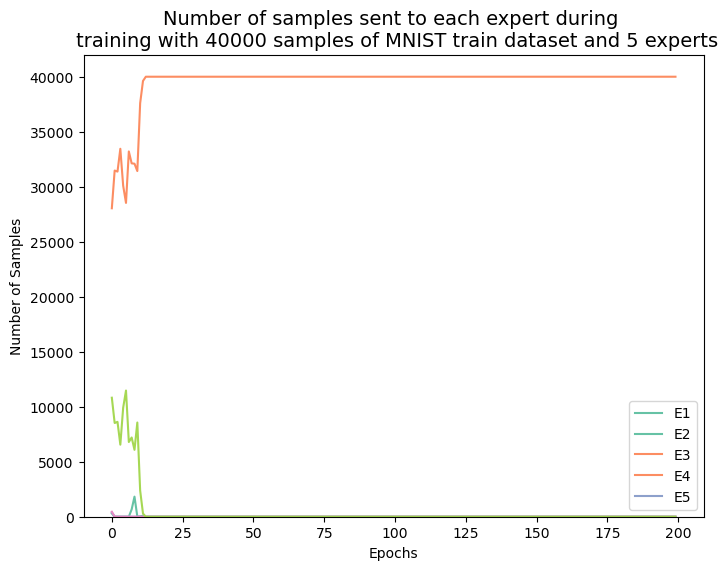

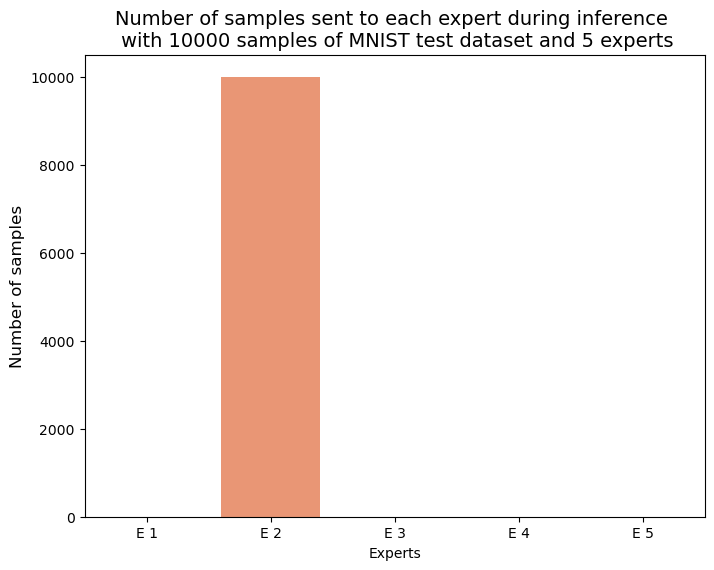

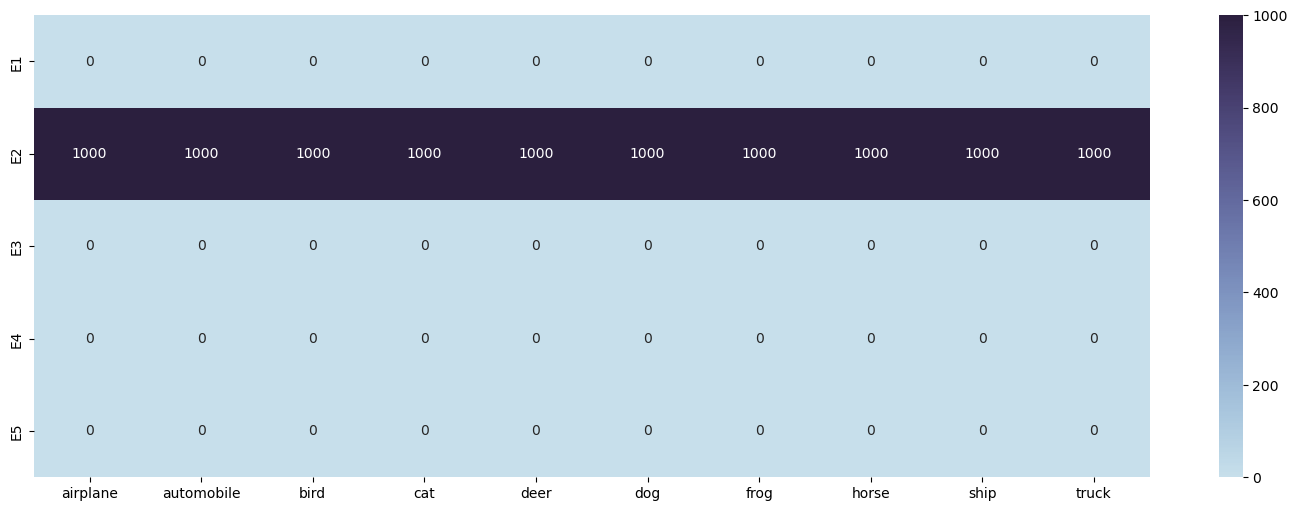

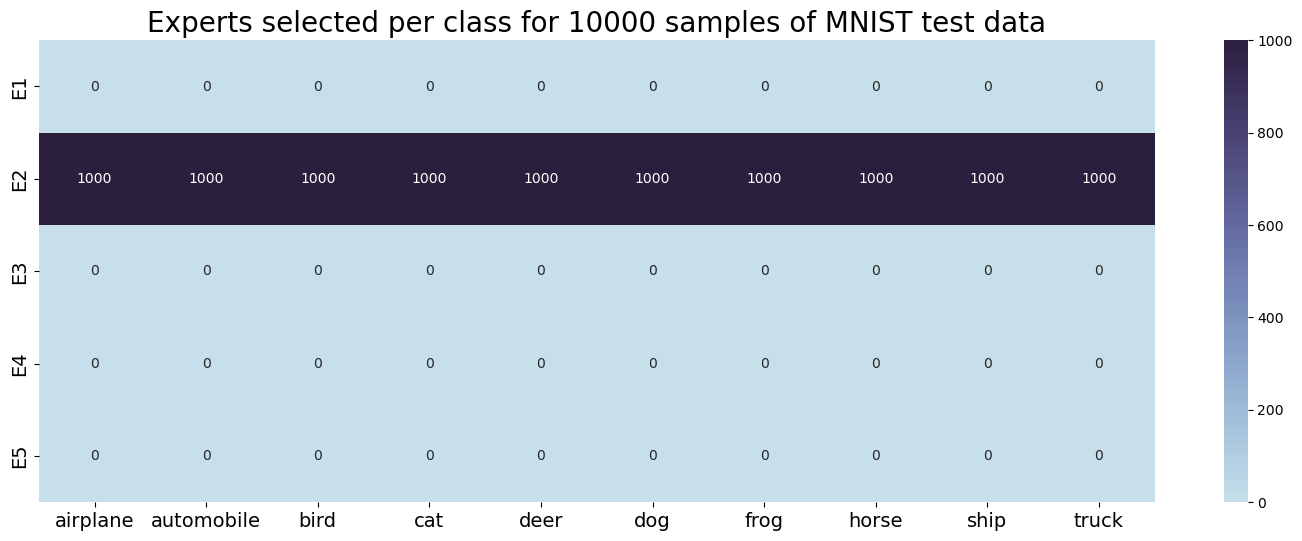

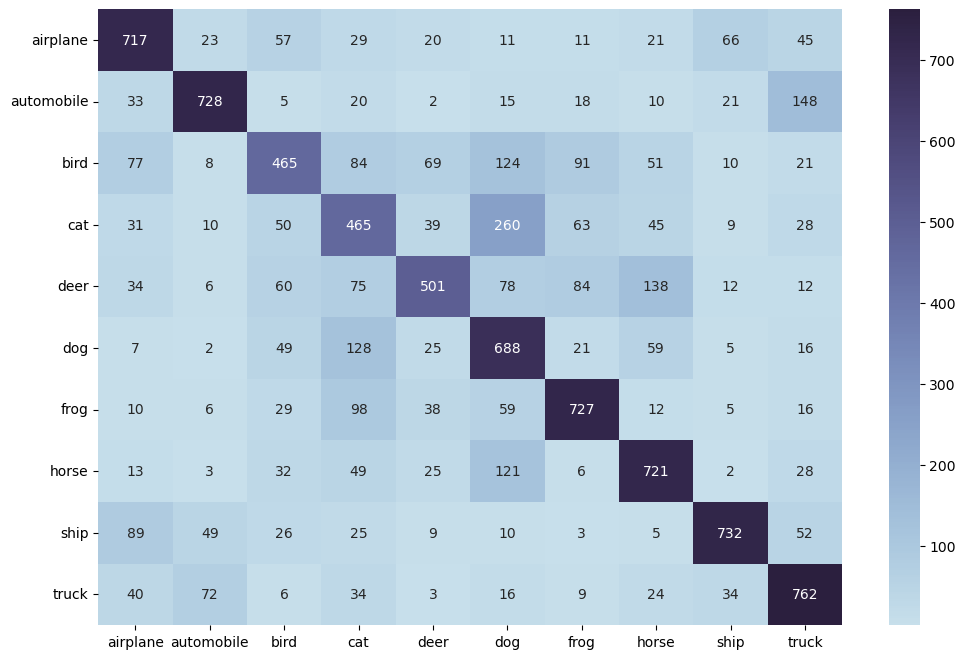

In [16]:
m = 'cifar10_with_attention_rand_init'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.372
Max Validation Accuracy 0.611
Min Validation Error 0.389
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 0
new_cifar10_with_attention_rand_init_10_5_models.pt


<Figure size 640x480 with 0 Axes>

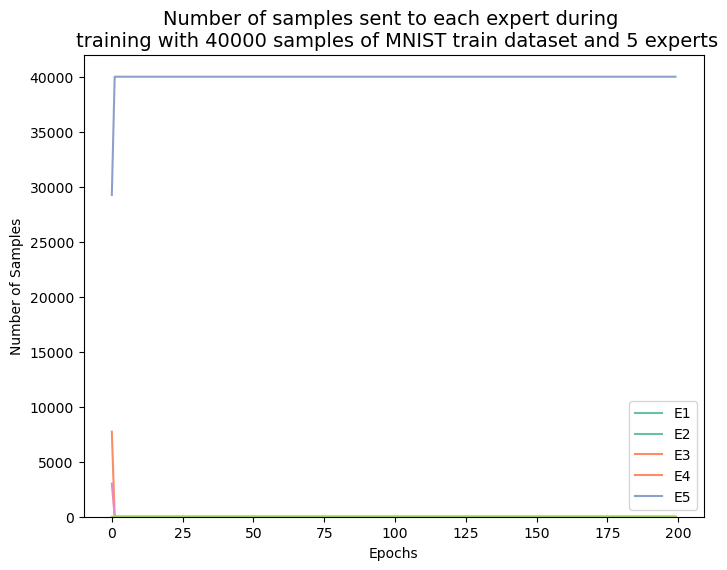

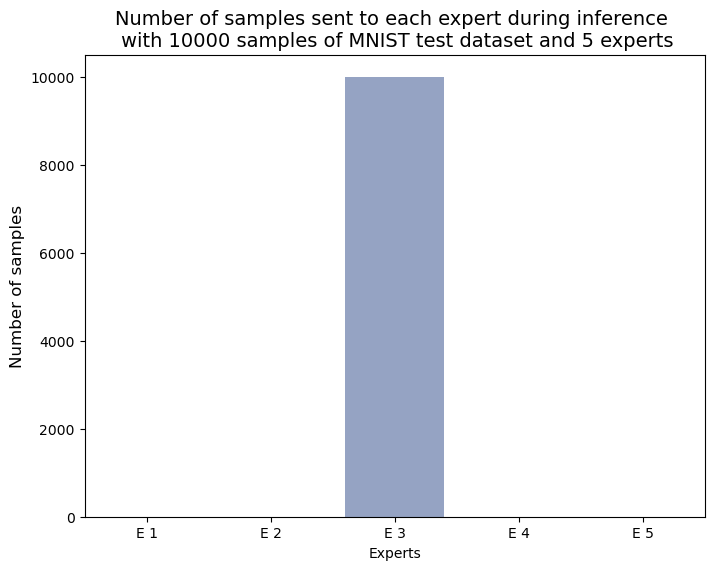

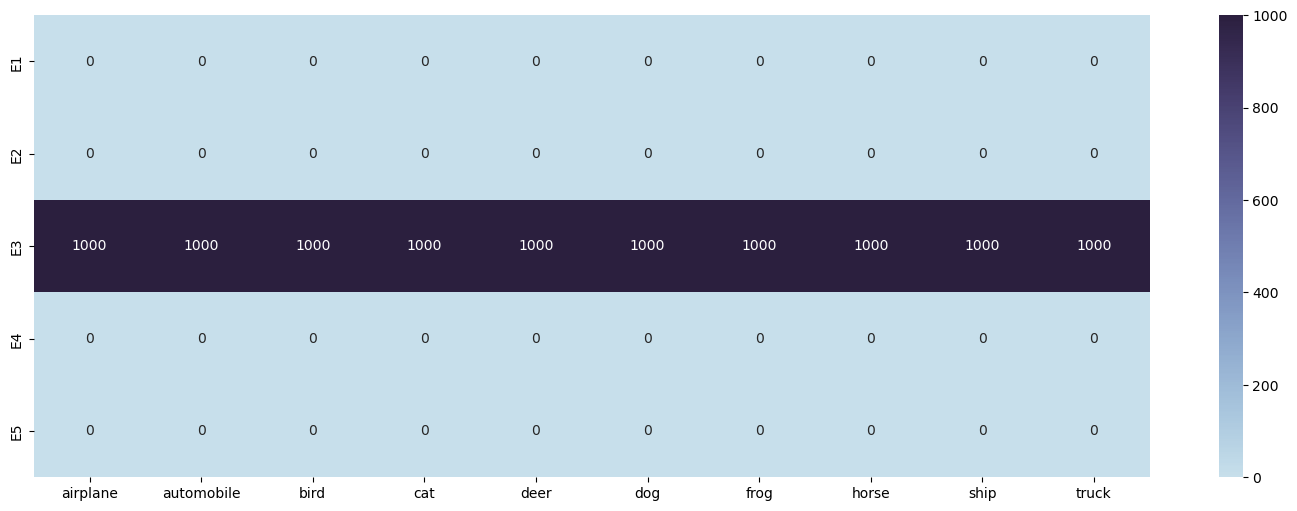

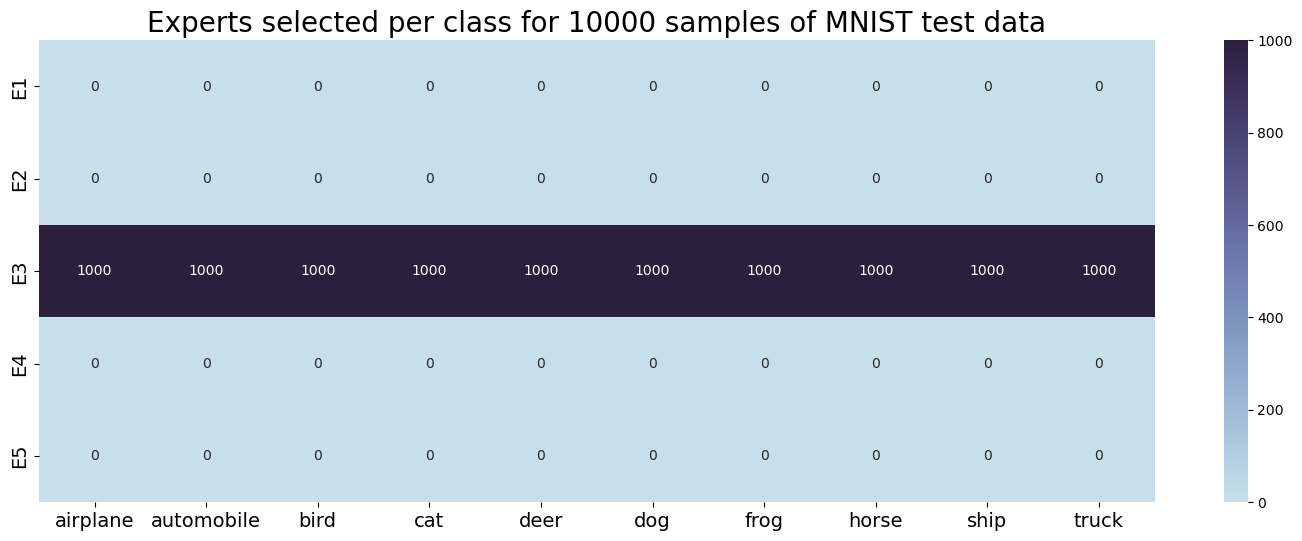

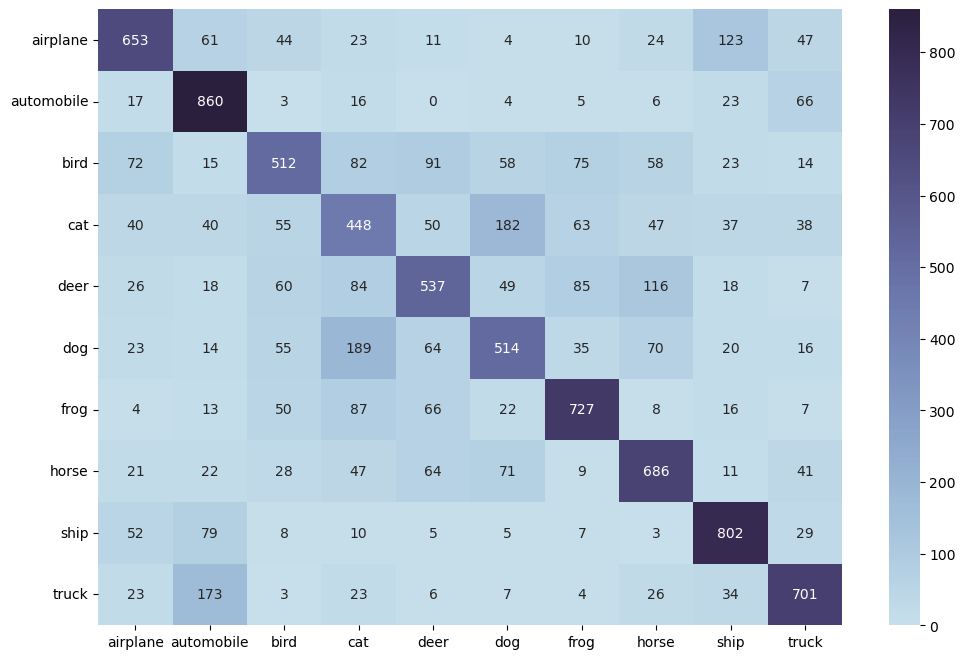

In [20]:
m = 'new_cifar10_with_attention_rand_init'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.374
Max Validation Accuracy 0.609
Min Validation Error 0.391
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 2
cifar10_with_attention_rand_init_10_10_models.pt


<Figure size 640x480 with 0 Axes>

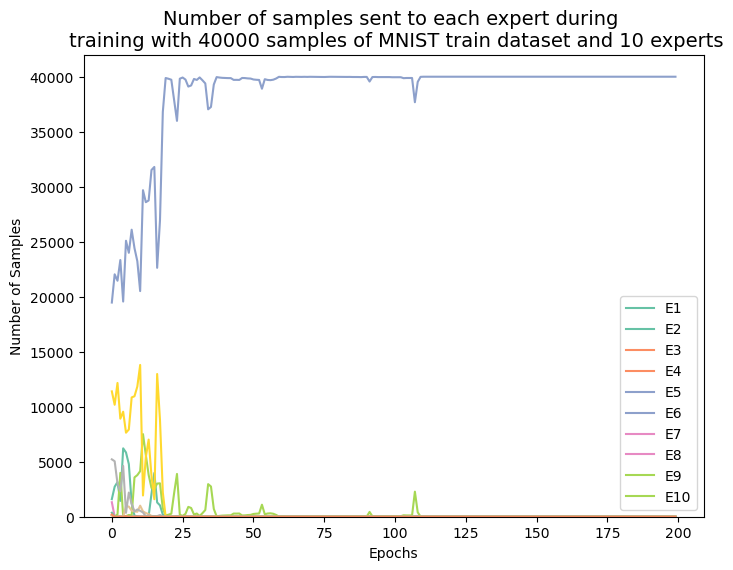

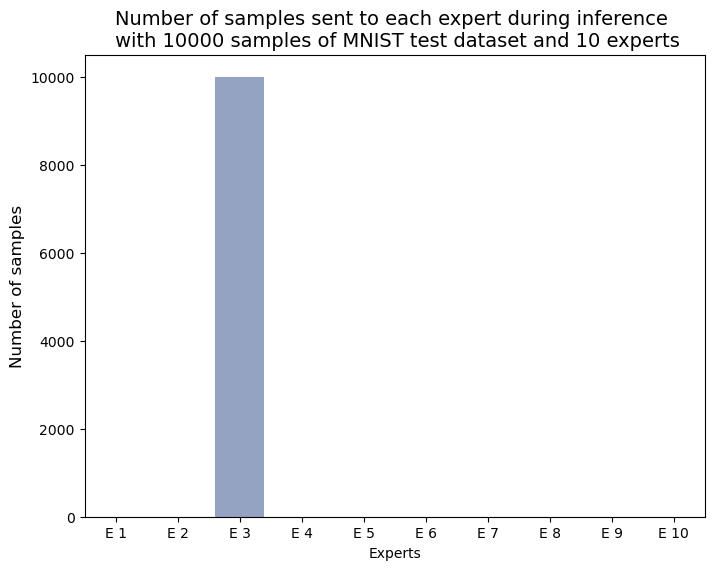

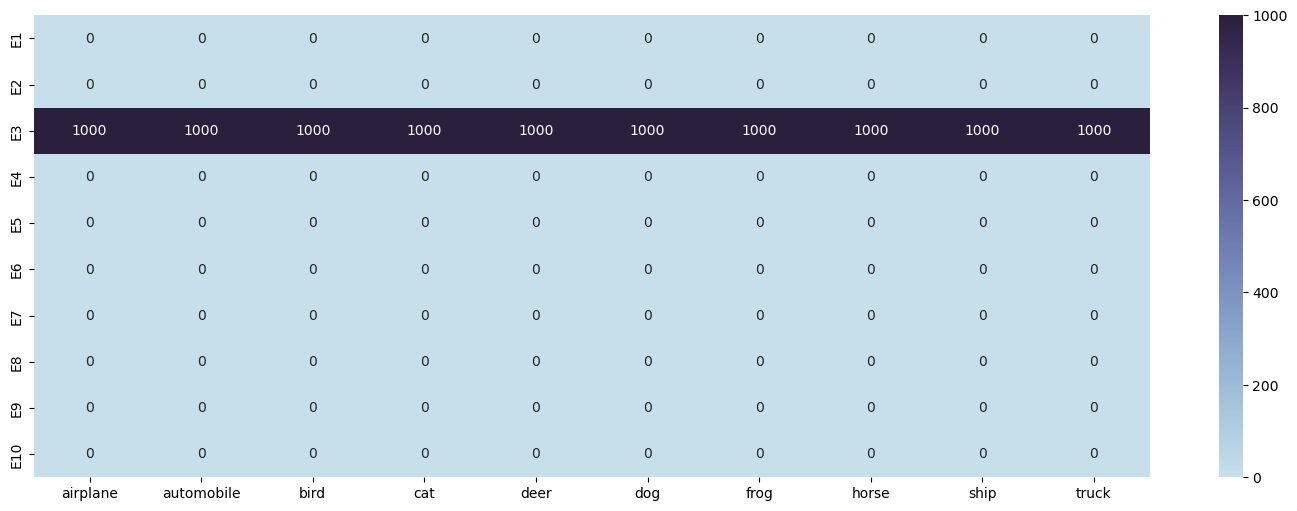

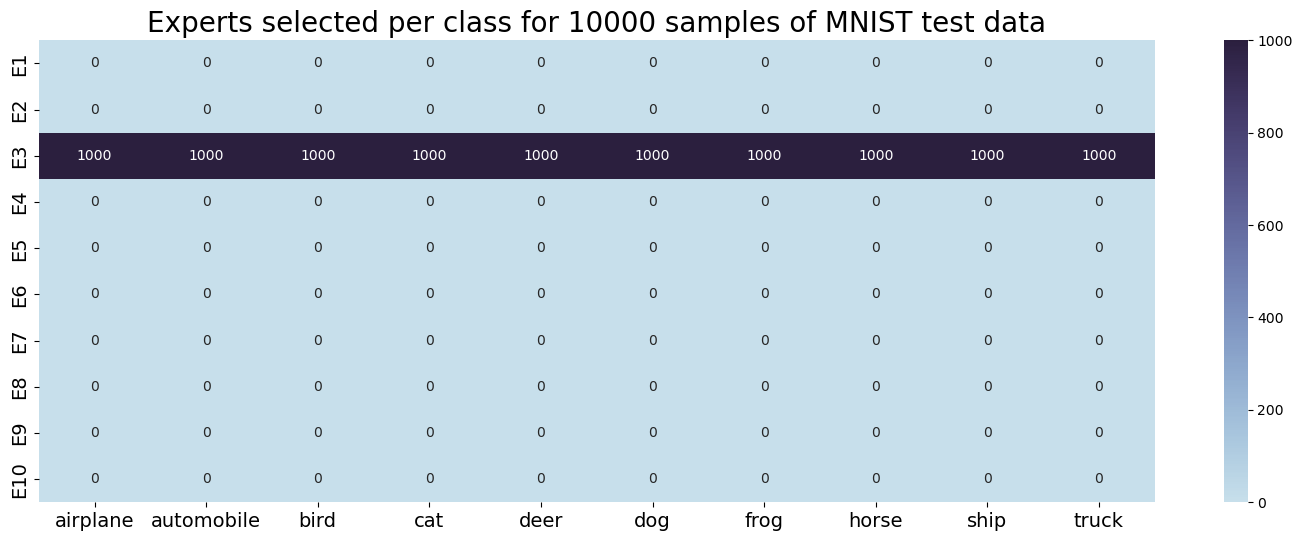

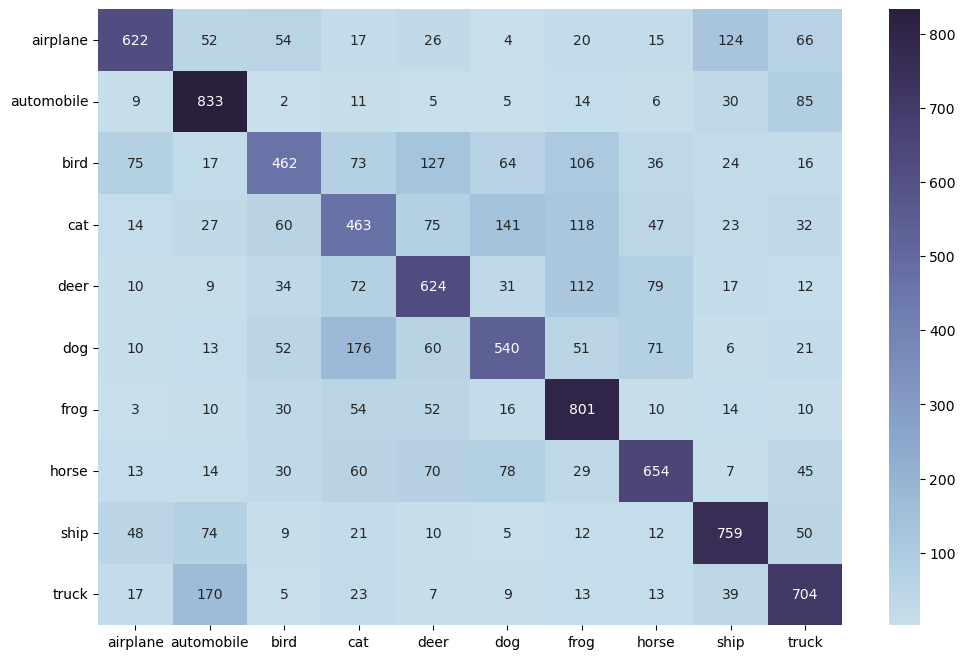

In [20]:
m = 'cifar10_with_attention_rand_init'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, 'moe_expectation_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path,
                  model_path=model_path, device=device)

Train Accuracy 0.378
Max Validation Accuracy 0.614
Min Validation Error 0.386
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 0
new_cifar10_with_attention_rand_init_10_10_models.pt


<Figure size 640x480 with 0 Axes>

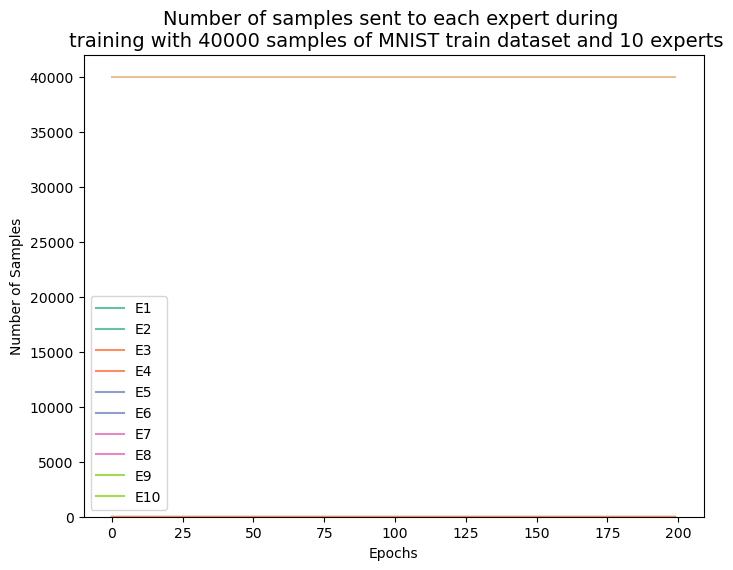

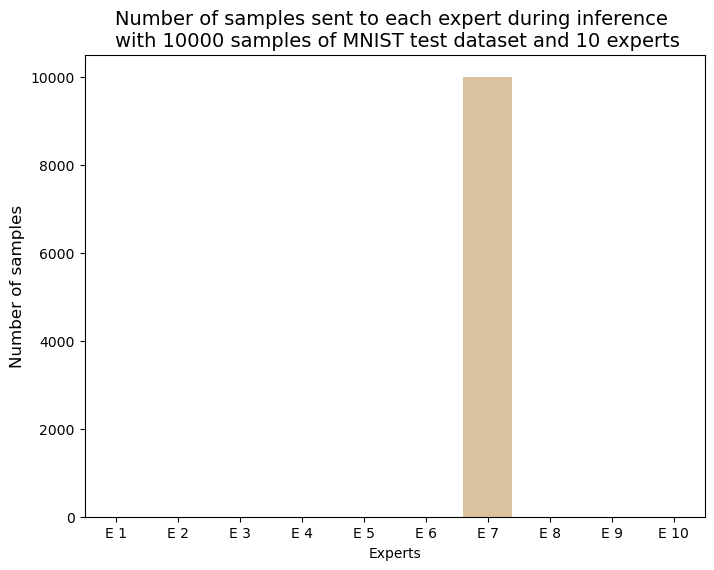

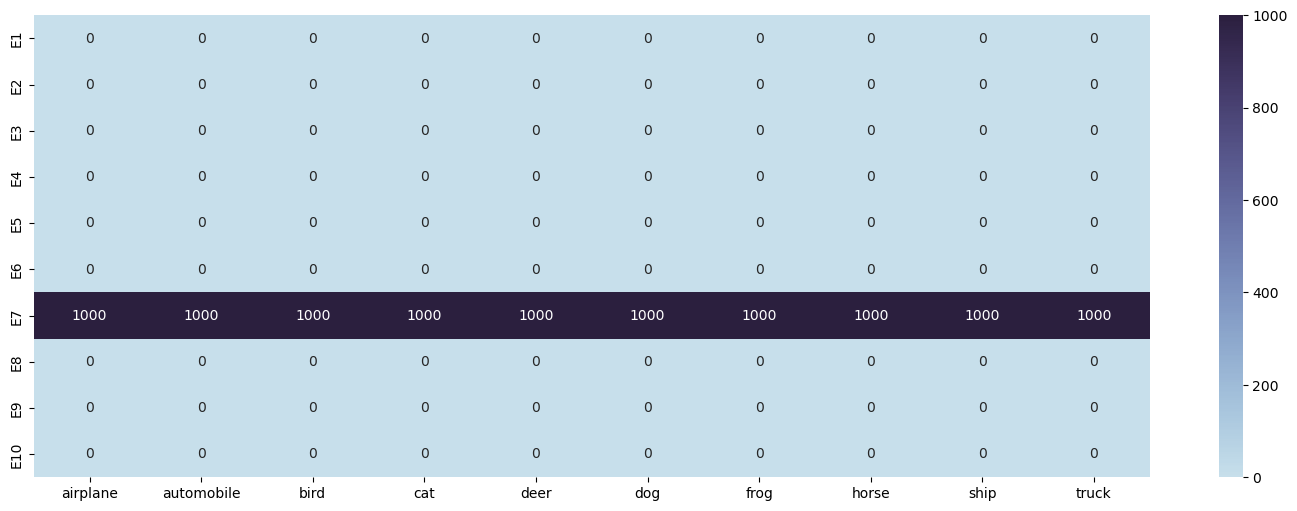

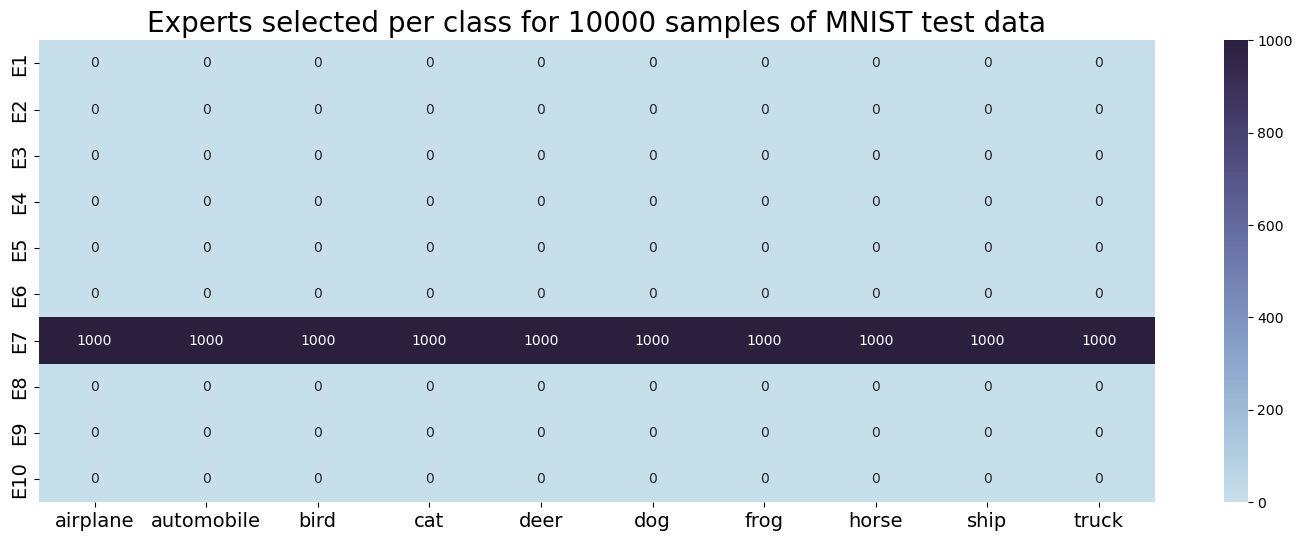

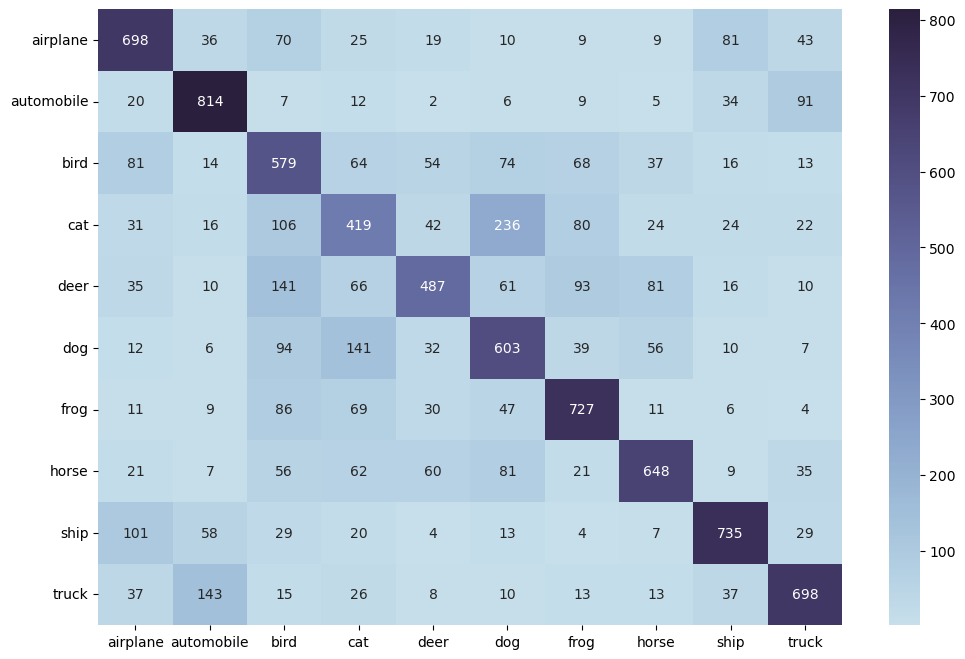

In [21]:
m = 'new_cifar10_with_attention_rand_init'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.128
Max Validation Accuracy 0.791
Min Validation Error 0.209
Mutual Information 2.129
Sample Entropy 0.073
Expert Usage 2.266
Best model index 4
cifar10_with_attn_stochastic_rand_init_10_5_models.pt


<Figure size 640x480 with 0 Axes>

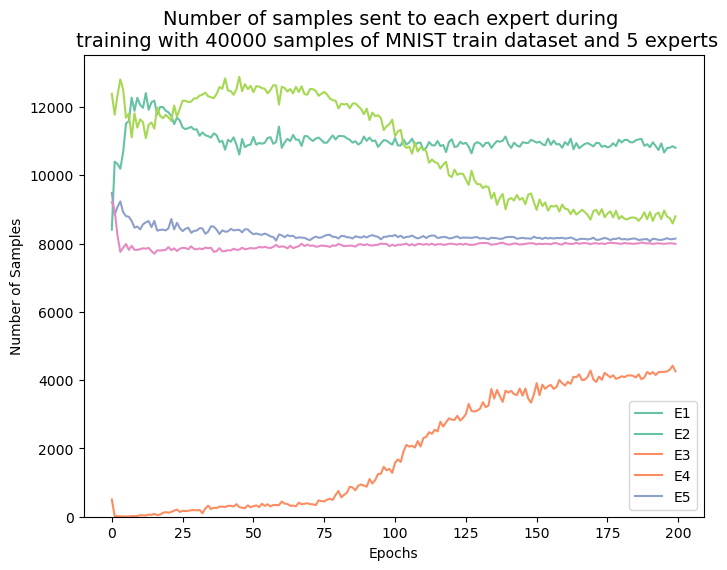

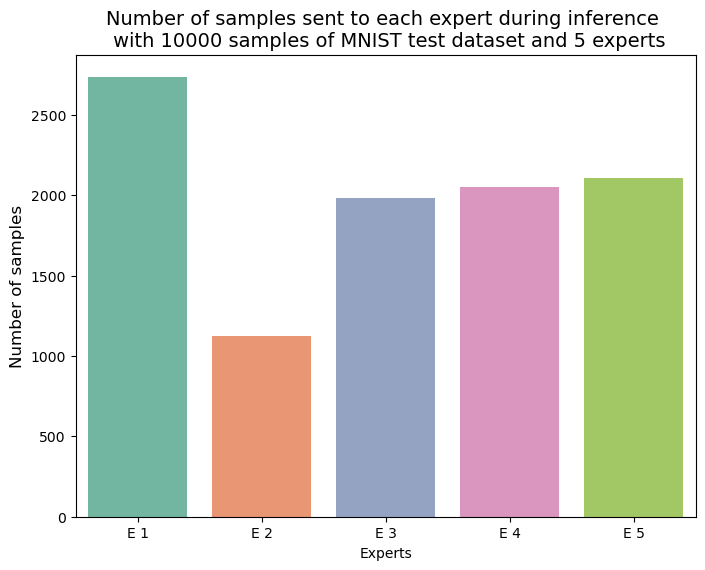

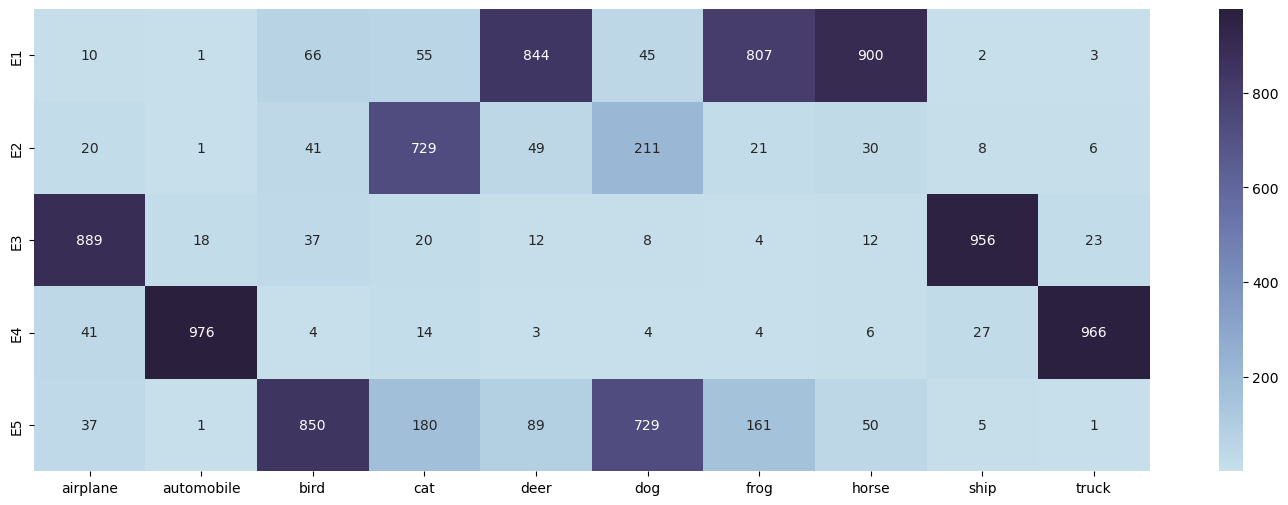

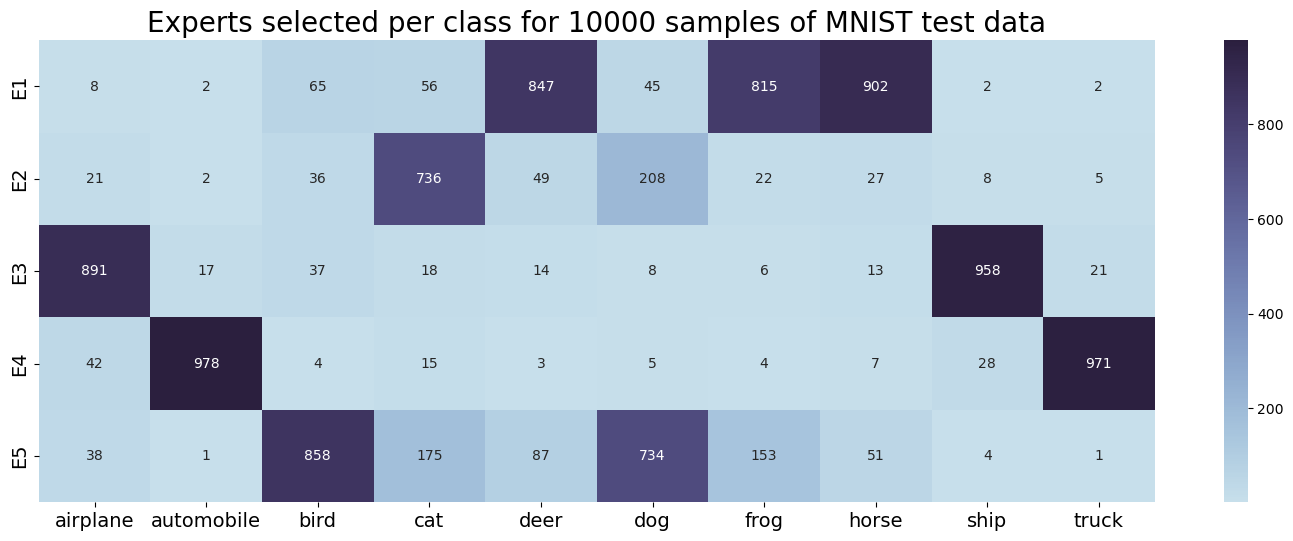

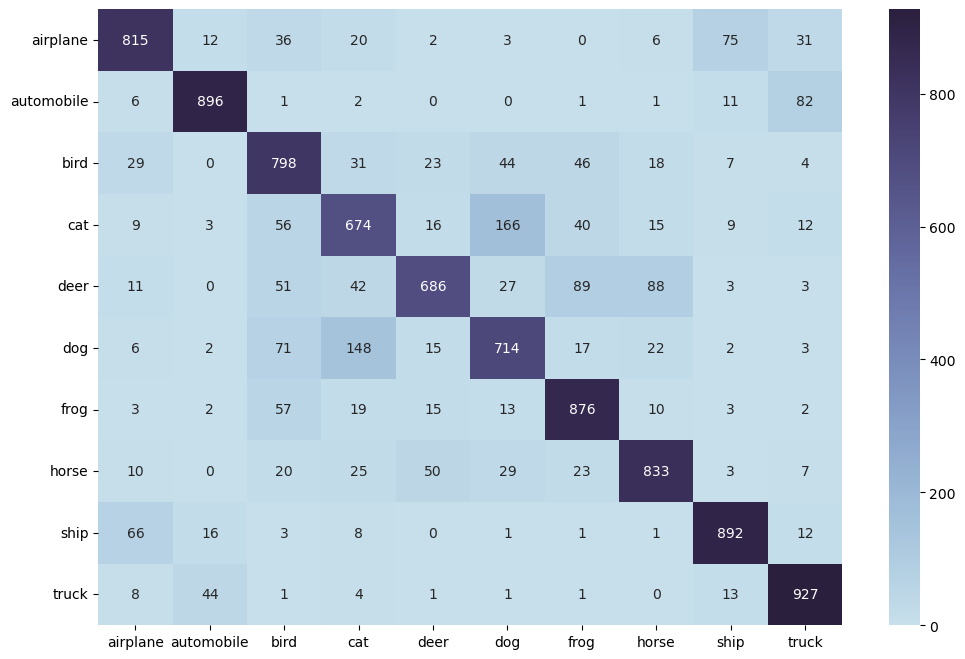

In [21]:
m = 'cifar10_with_attn_stochastic_rand_init'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, 'moe_expectation_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path,
                  model_path=model_path, device=device)

Train Accuracy 0.159
Max Validation Accuracy 0.755
Min Validation Error 0.245
Mutual Information 1.736
Sample Entropy 0.026
Expert Usage 1.887
Best model index 2
new_cifar10_with_attn_stochastic_rand_init_10_5_models.pt


<Figure size 640x480 with 0 Axes>

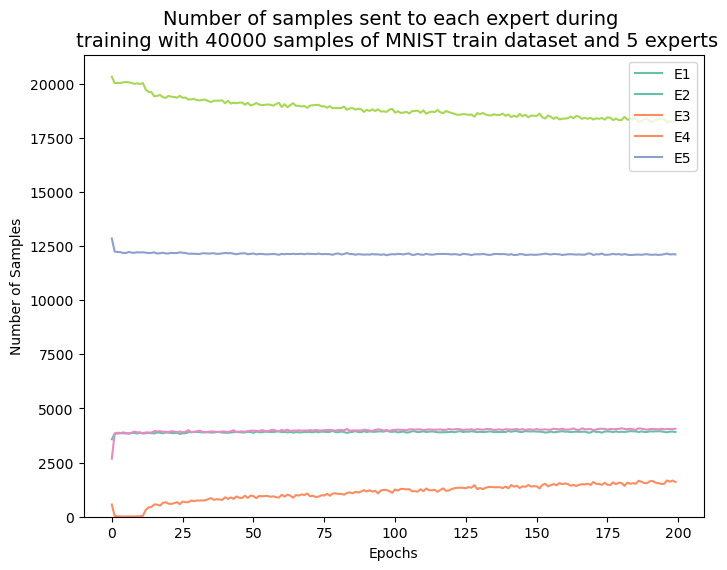

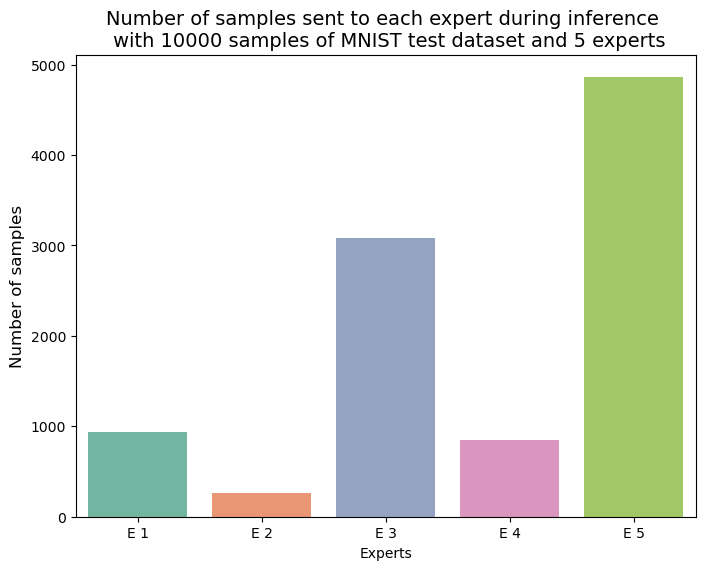

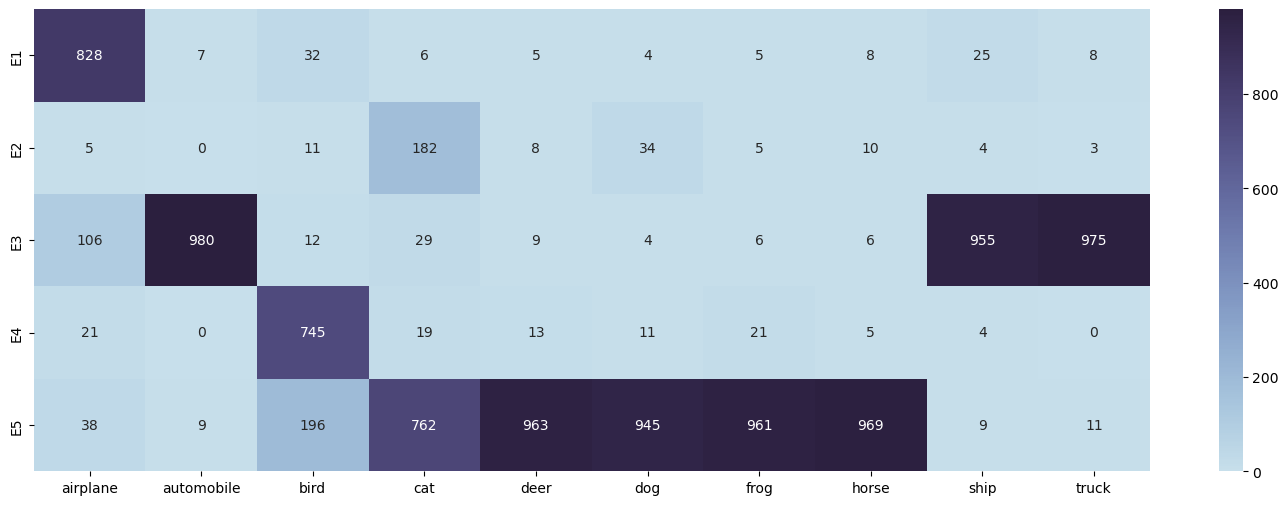

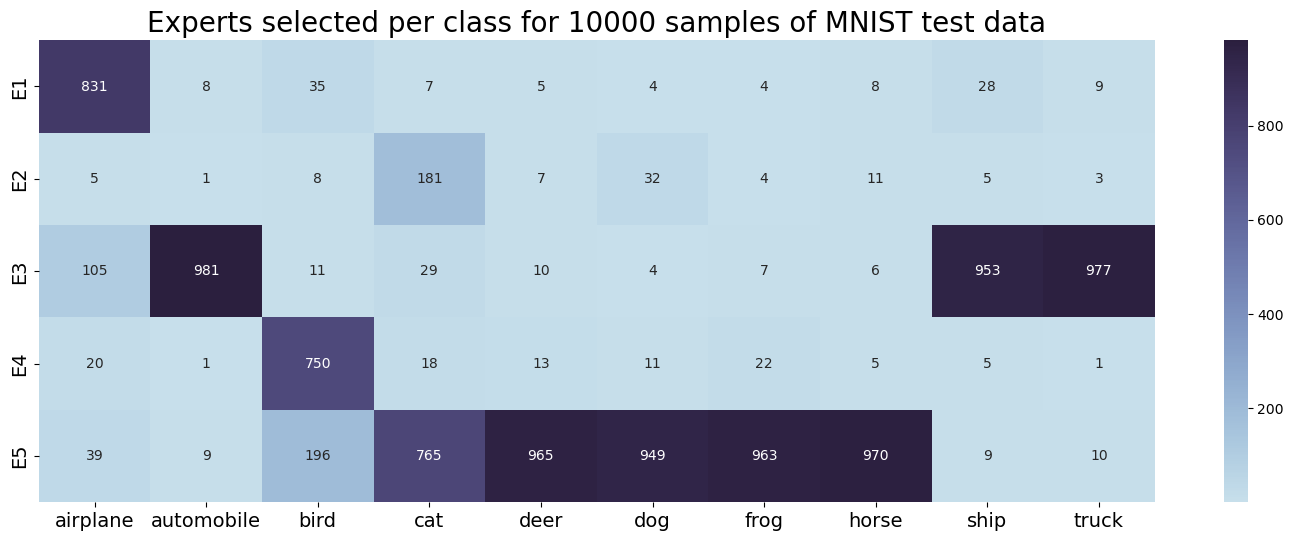

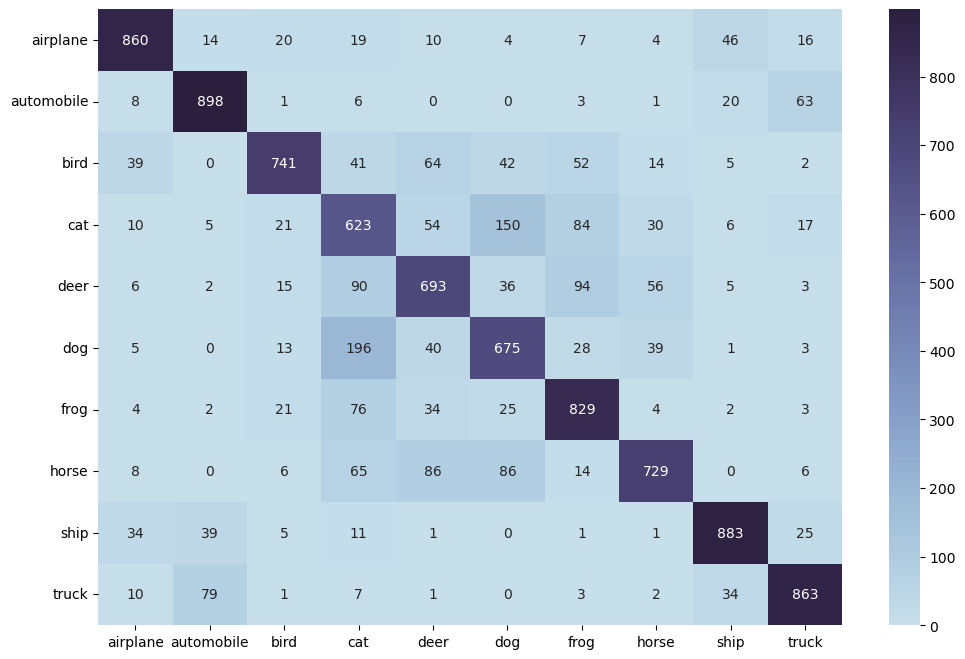

In [28]:
m = 'new_cifar10_with_attn_stochastic_rand_init'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, 'moe_expectation_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path,
                  model_path=model_path, device=device)

Train Accuracy 0.046
Max Validation Accuracy 0.831
Min Validation Error 0.169
Mutual Information 3.189
Sample Entropy 0.083
Expert Usage 3.317
Best model index 7
cifar10_with_attn_stochastic_rand_init_10_10_models.pt


<Figure size 640x480 with 0 Axes>

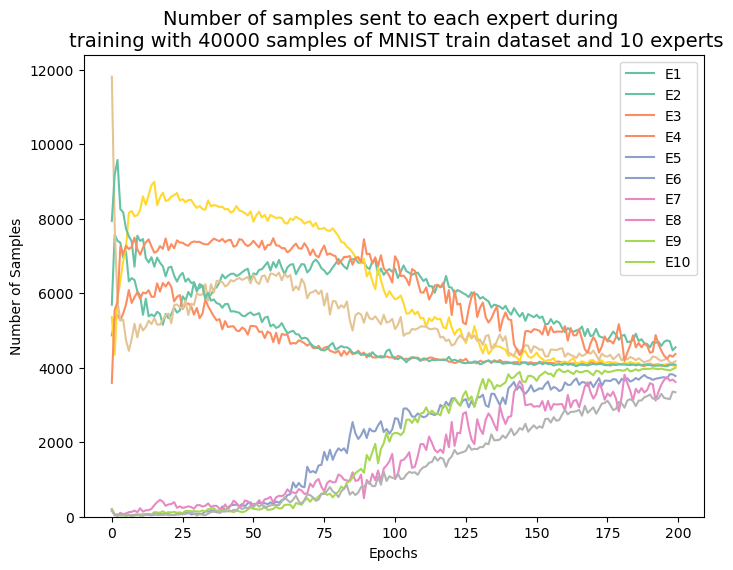

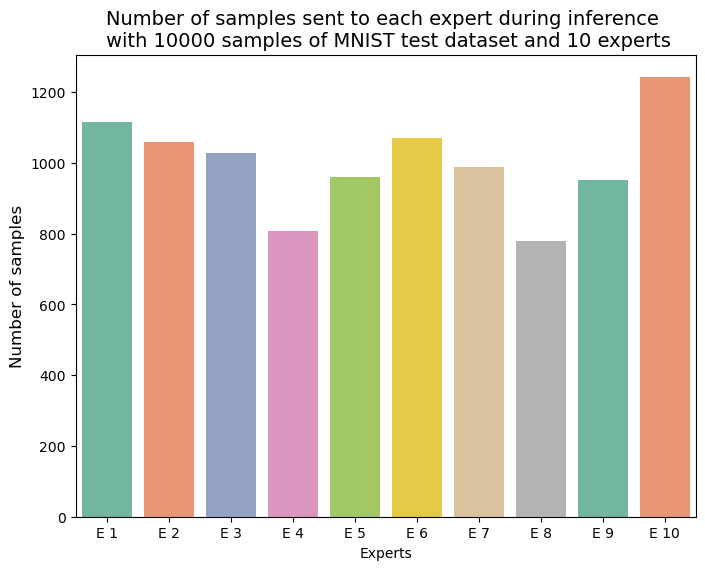

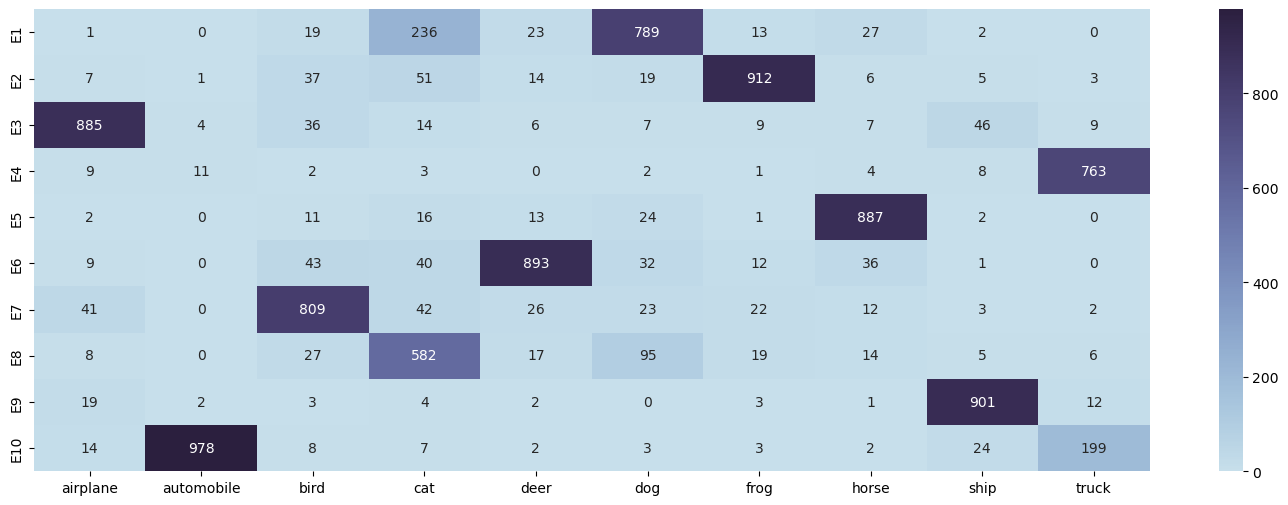

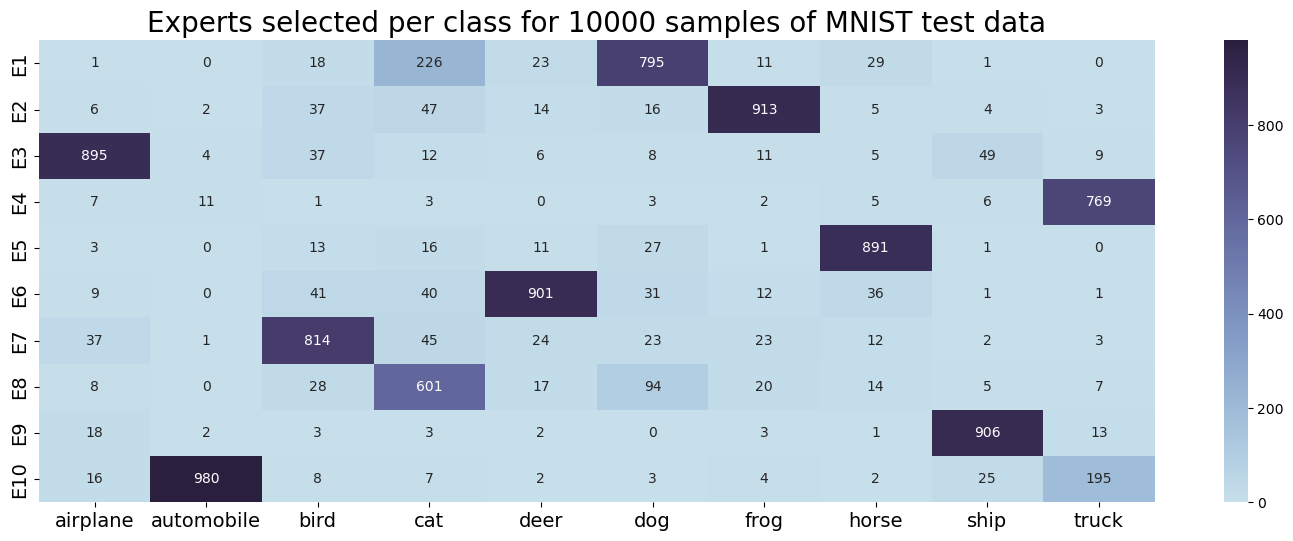

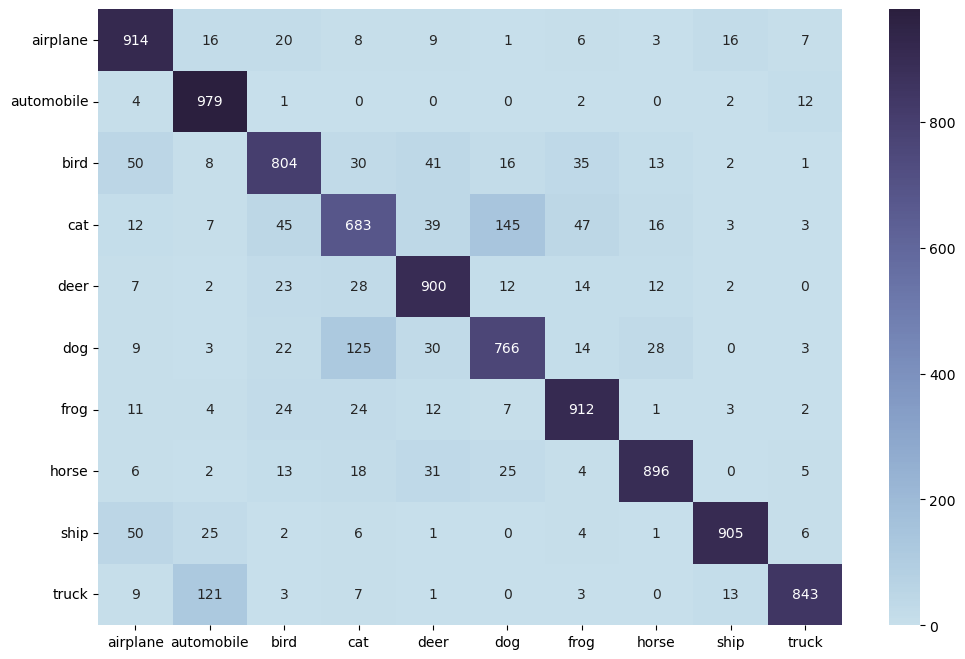

In [22]:
m = 'cifar10_with_attn_stochastic_rand_init'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, 'moe_expectation_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path,
                  model_path=model_path, device=device)

Train Accuracy 0.023
Max Validation Accuracy 0.856
Min Validation Error 0.144
Mutual Information 3.263
Sample Entropy 0.030
Expert Usage 3.321
Best model index 7
new_cifar10_with_attn_stochastic_rand_init_10_10_models.pt


<Figure size 640x480 with 0 Axes>

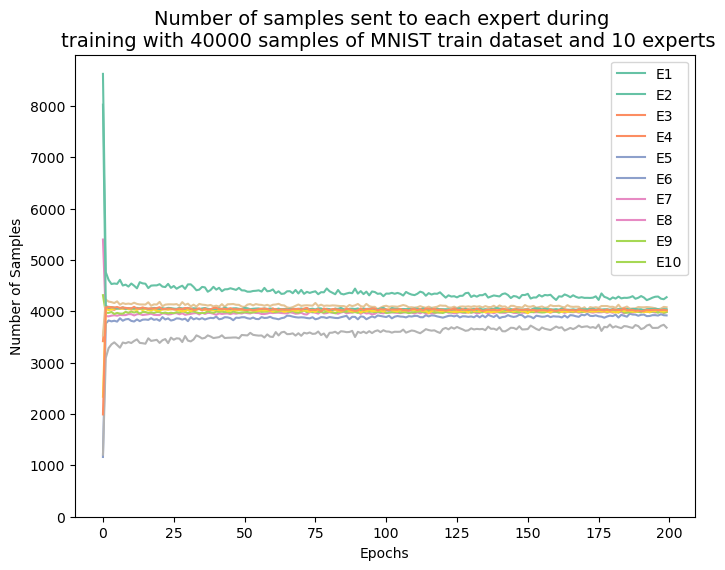

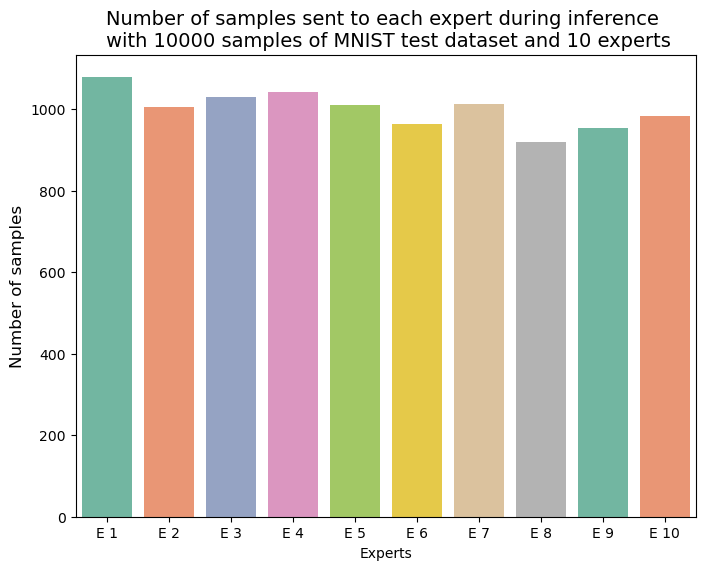

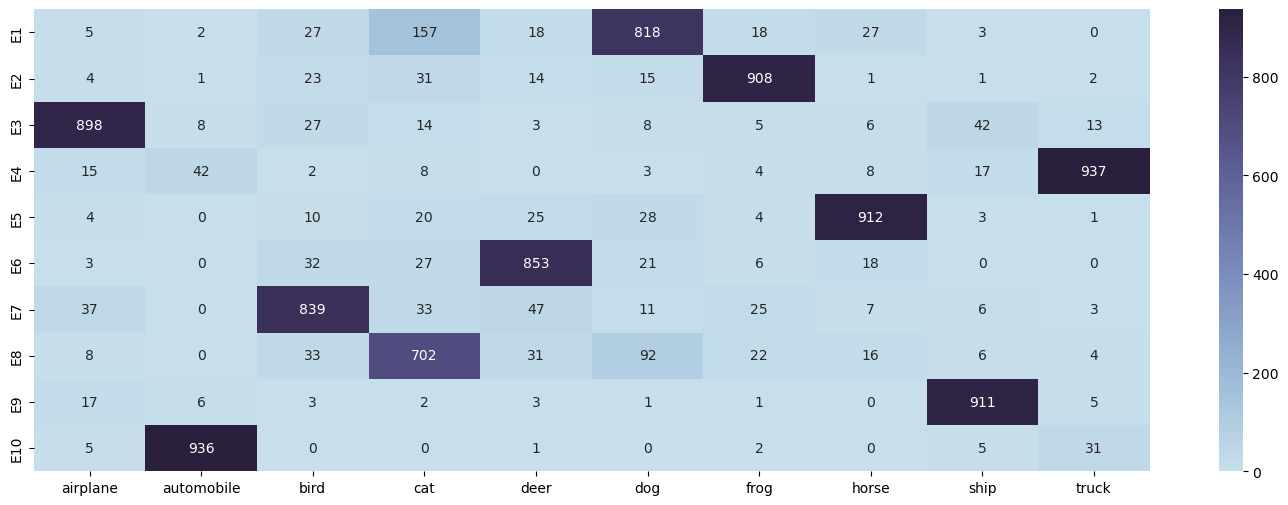

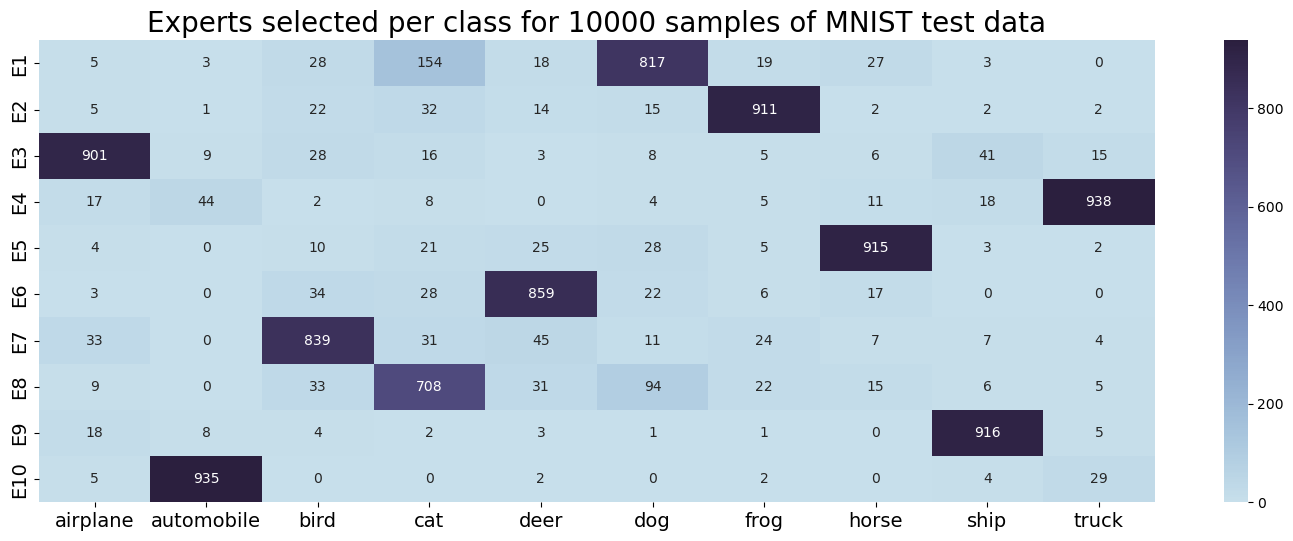

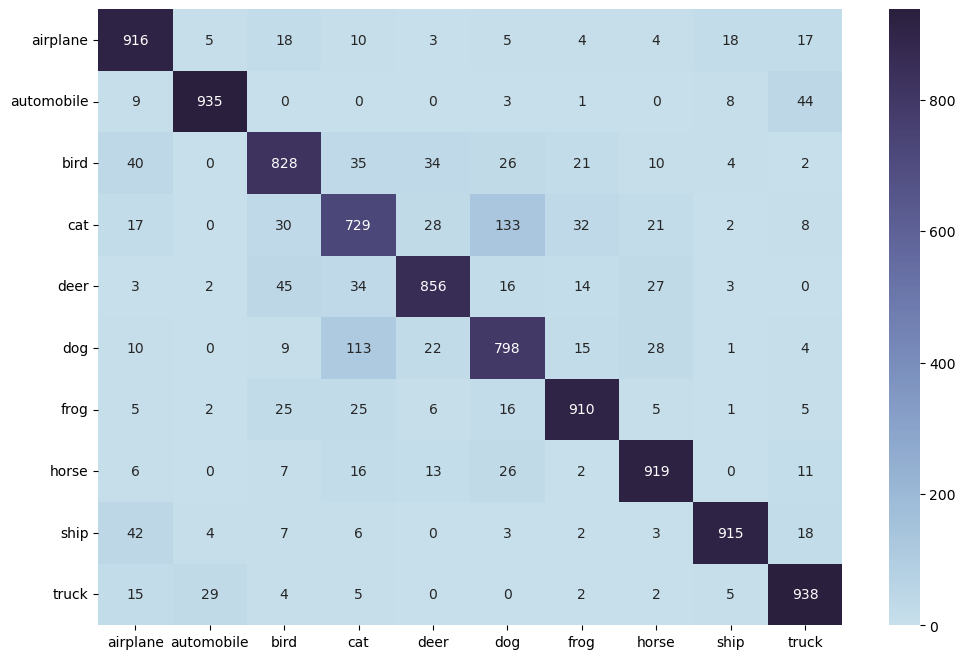

In [23]:
m = 'new_cifar10_with_attn_stochastic_rand_init'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, 'moe_expectation_model', test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                  classes=classes, num_epochs=num_epochs, fig_path=fig_path,
                  model_path=model_path, device=device)

Train Accuracy 0.365
Max Validation Accuracy 0.620
Min Validation Error 0.380
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 2
cifar10_with_attention_rand_init_top_1_10_5_models.pt


<Figure size 640x480 with 0 Axes>

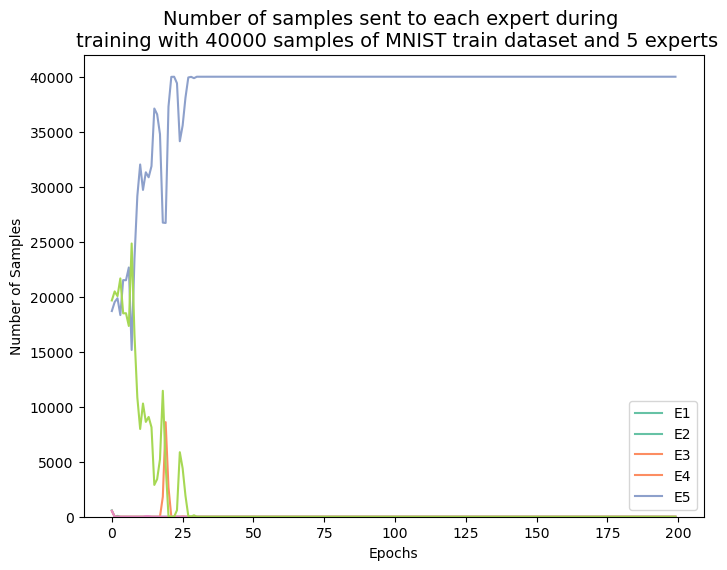

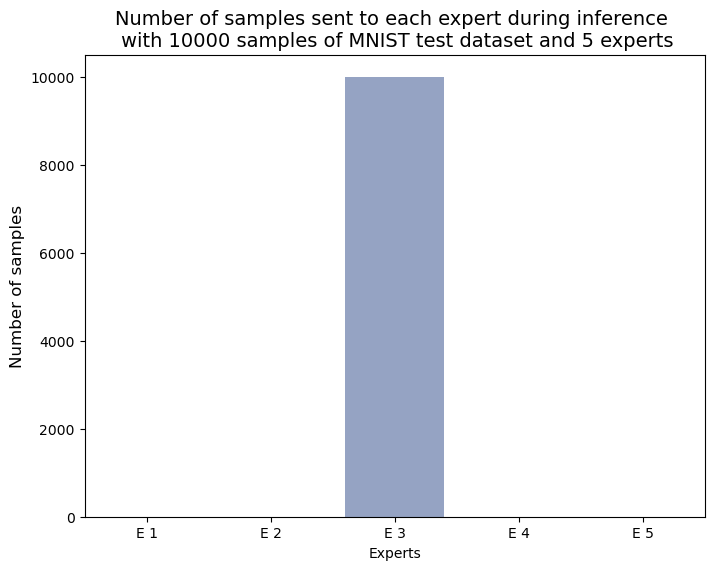

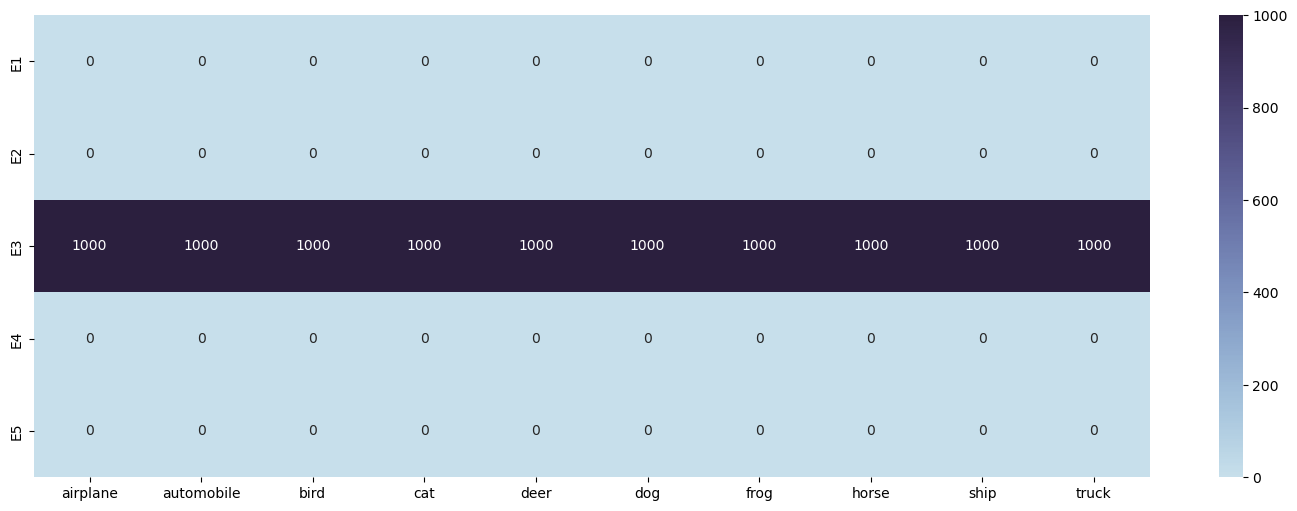

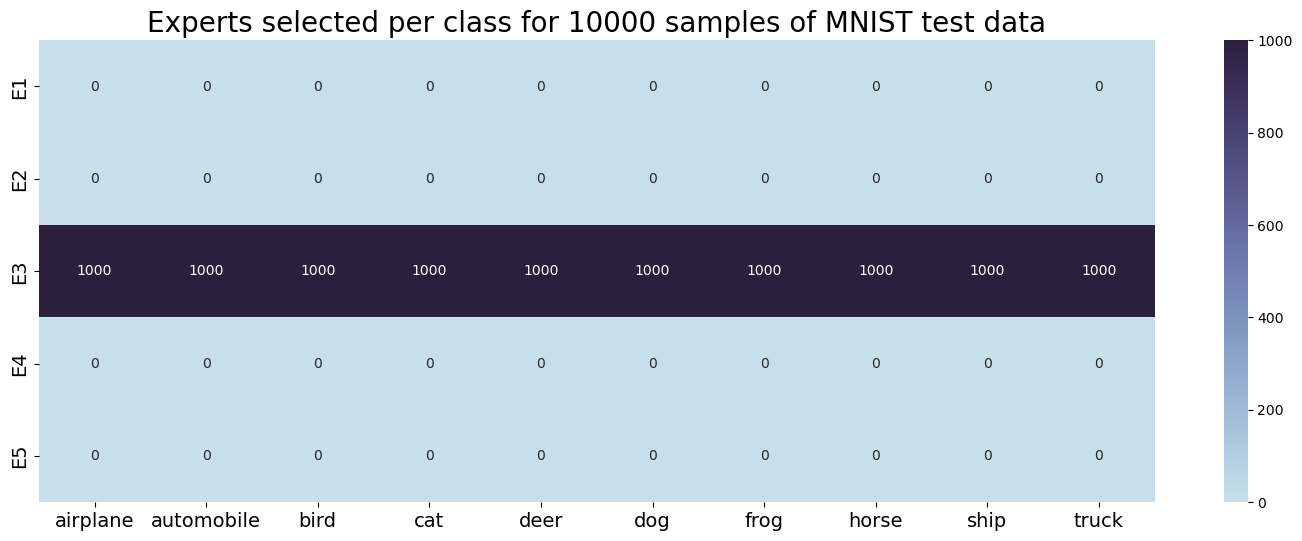

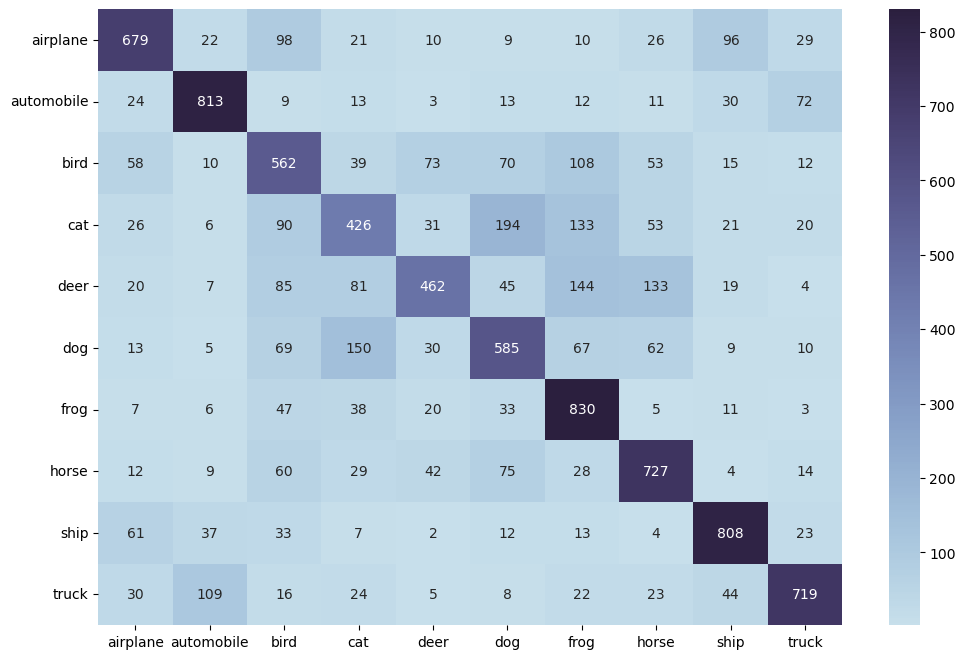

In [17]:
m = 'cifar10_with_attention_rand_init_top_1'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.365
Max Validation Accuracy 0.627
Min Validation Error 0.373
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 5
new_cifar10_with_attention_rand_init_top_1_10_5_models.pt


<Figure size 640x480 with 0 Axes>

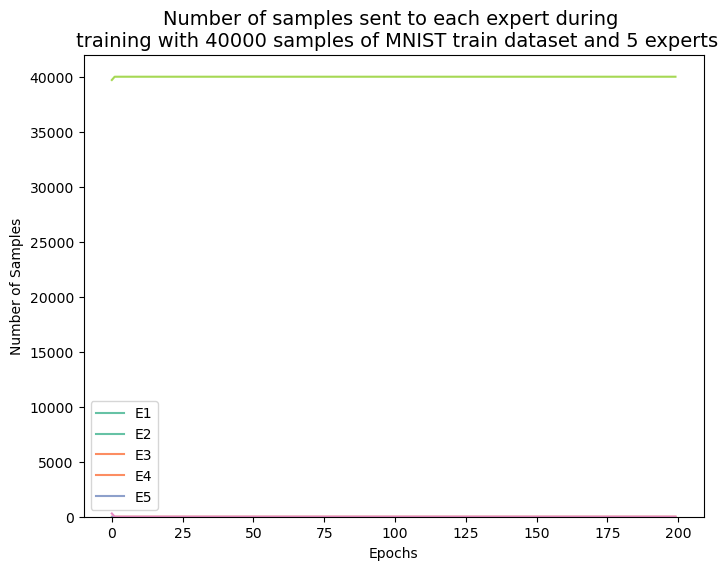

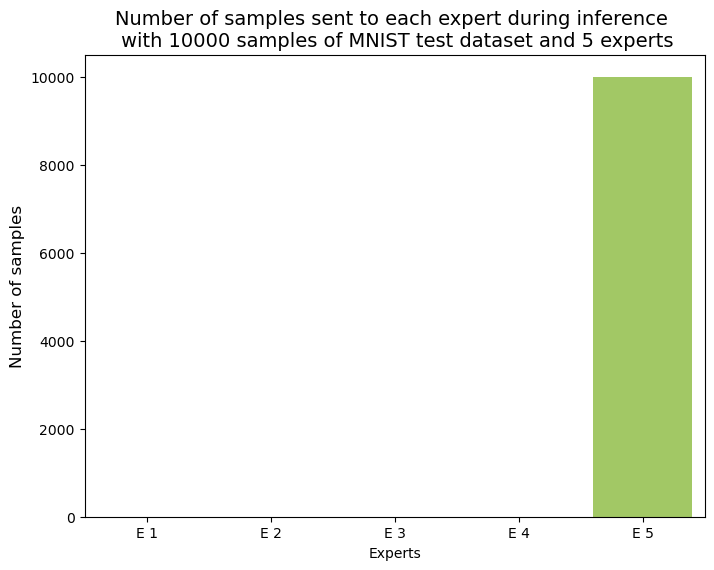

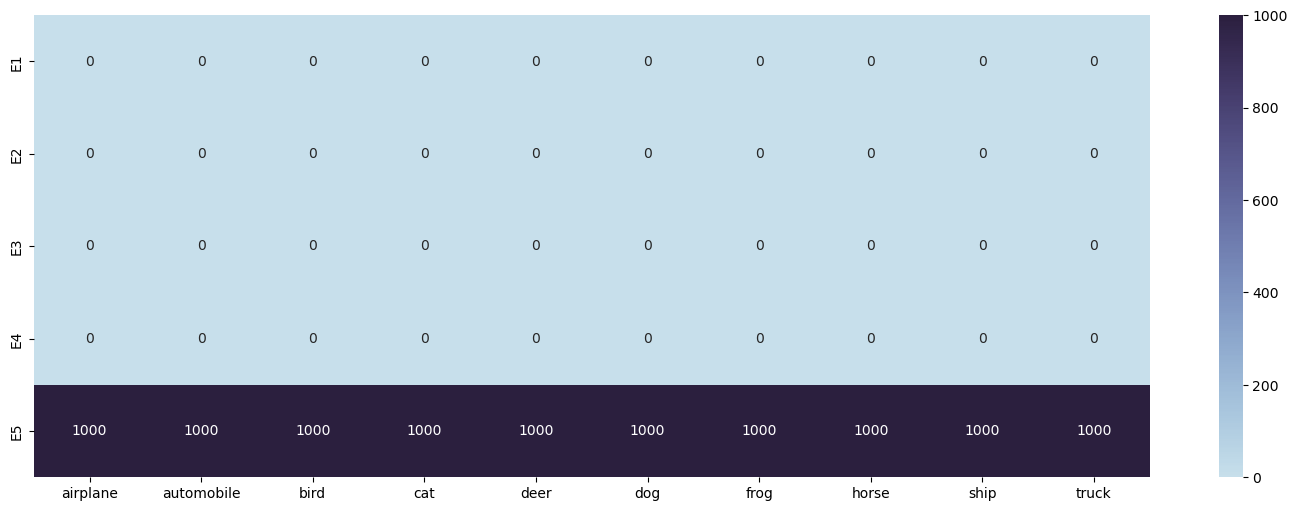

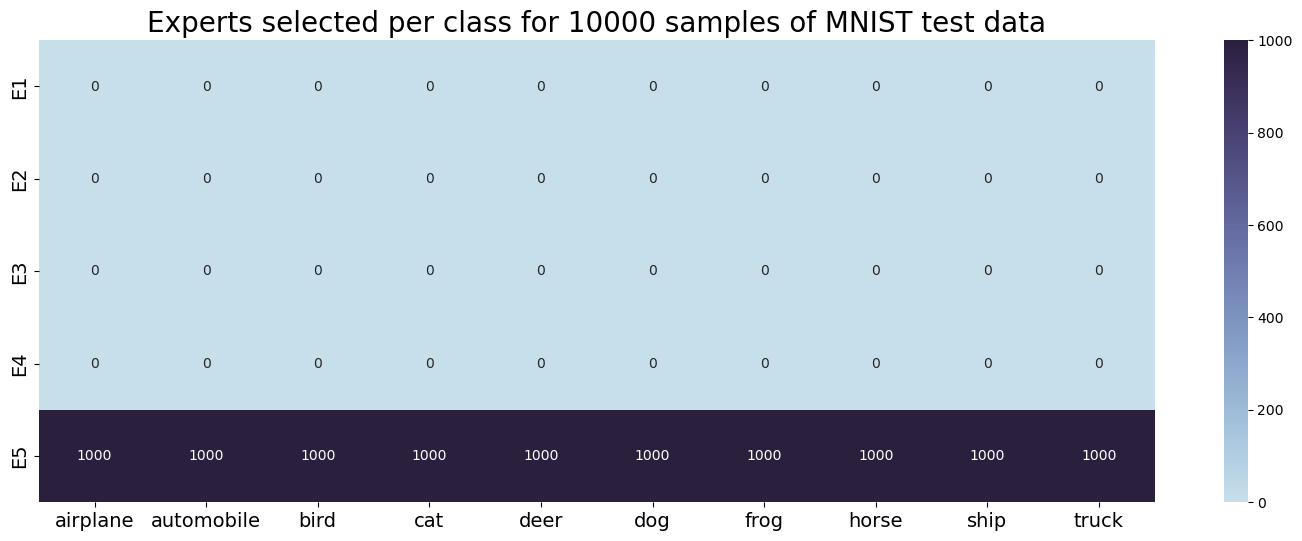

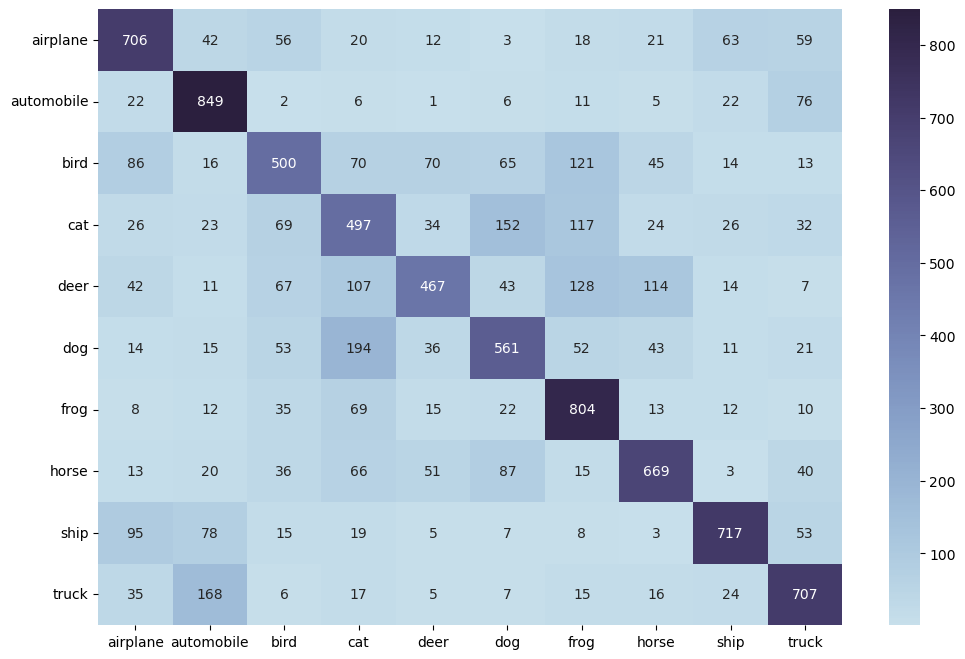

In [24]:
m = 'new_cifar10_with_attention_rand_init_top_1'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.369
Max Validation Accuracy 0.621
Min Validation Error 0.379
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 8
cifar10_with_attention_rand_init_top_1_10_10_models.pt


<Figure size 640x480 with 0 Axes>

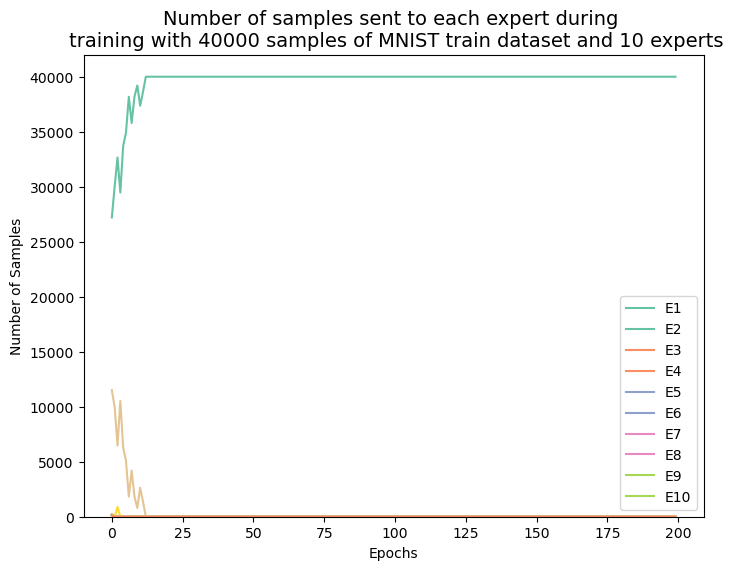

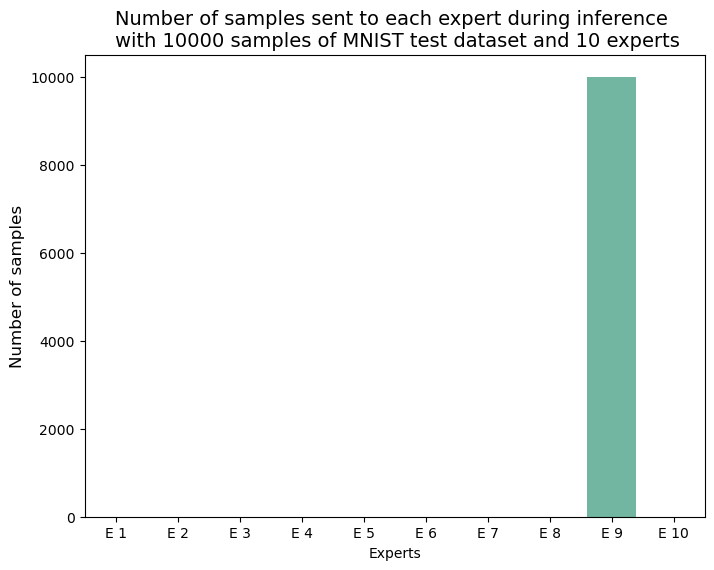

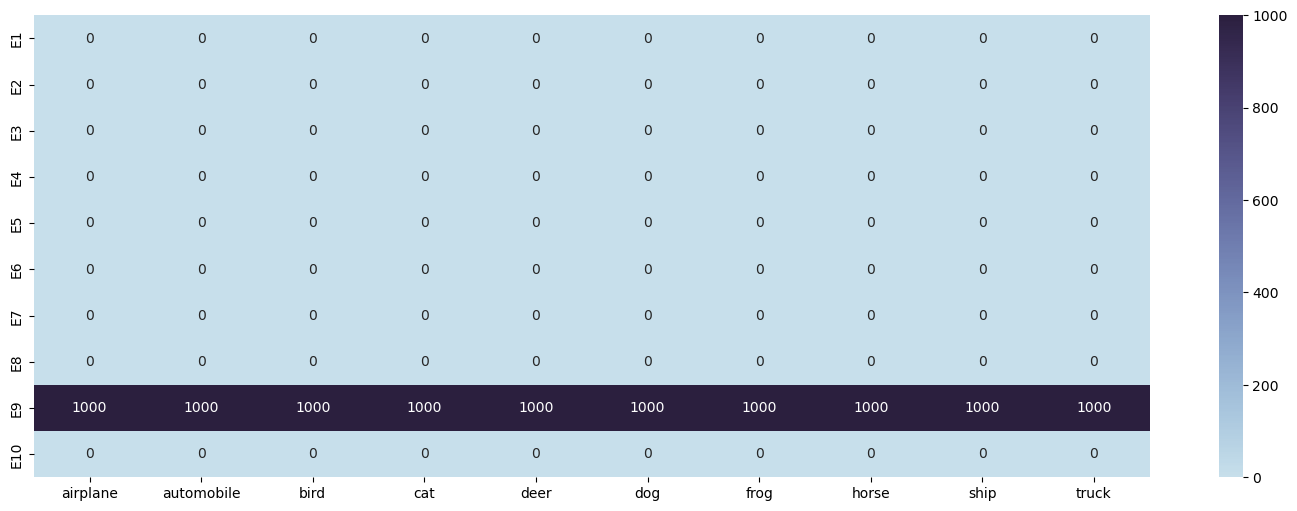

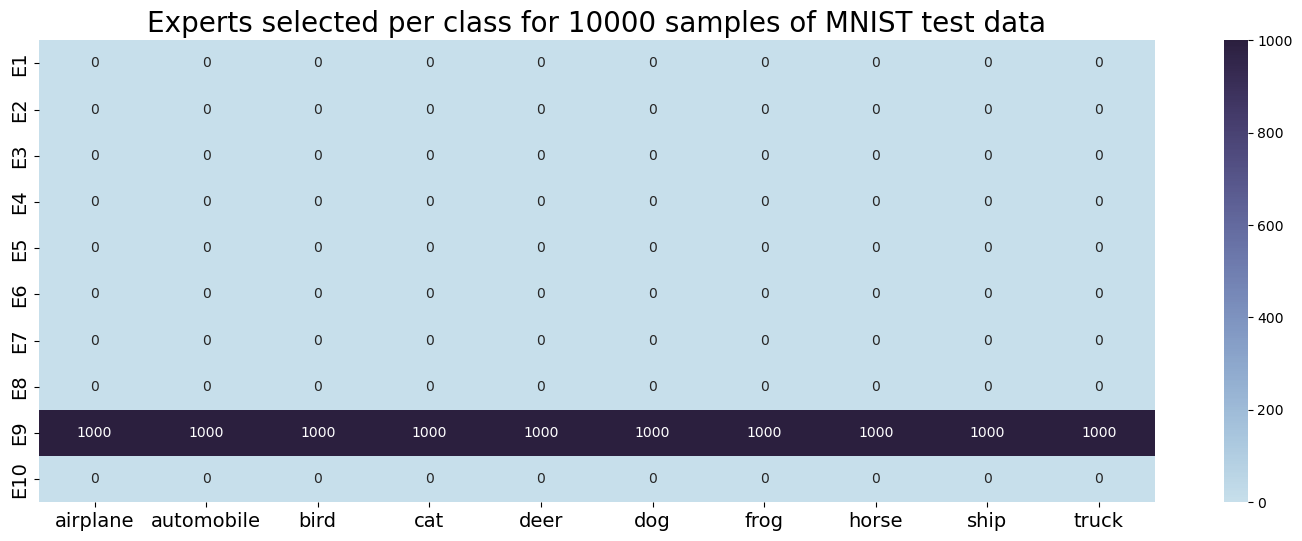

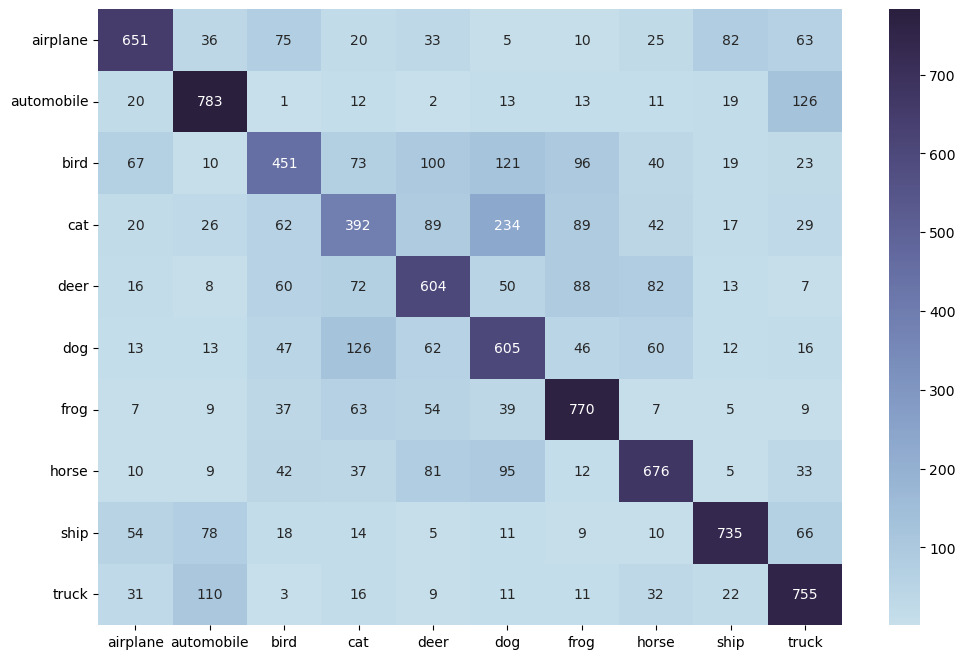

In [23]:
m = 'cifar10_with_attention_rand_init_top_1'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.374
Max Validation Accuracy 0.622
Min Validation Error 0.378
Mutual Information 0.000
Sample Entropy 0.000
Expert Usage 0.000
Best model index 8
new_cifar10_with_attention_rand_init_top_1_10_10_models.pt


<Figure size 640x480 with 0 Axes>

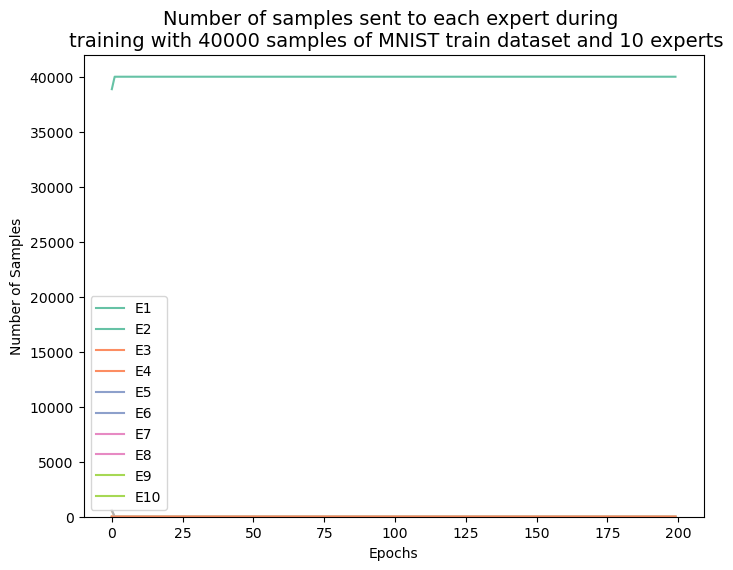

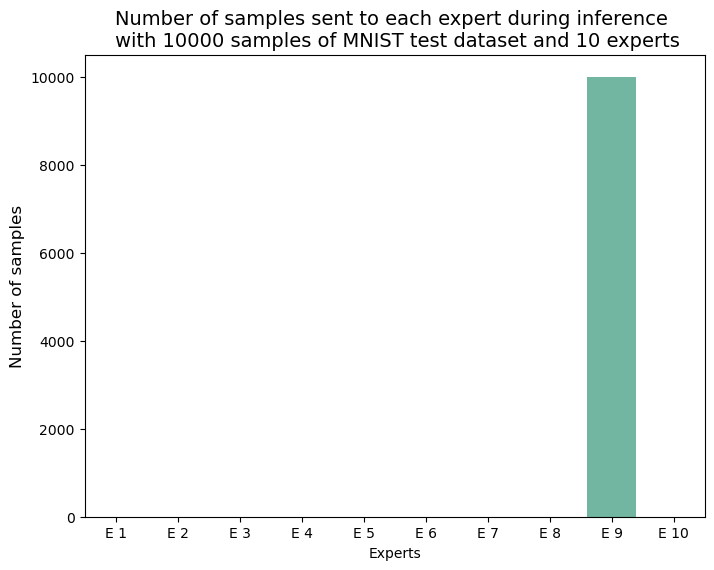

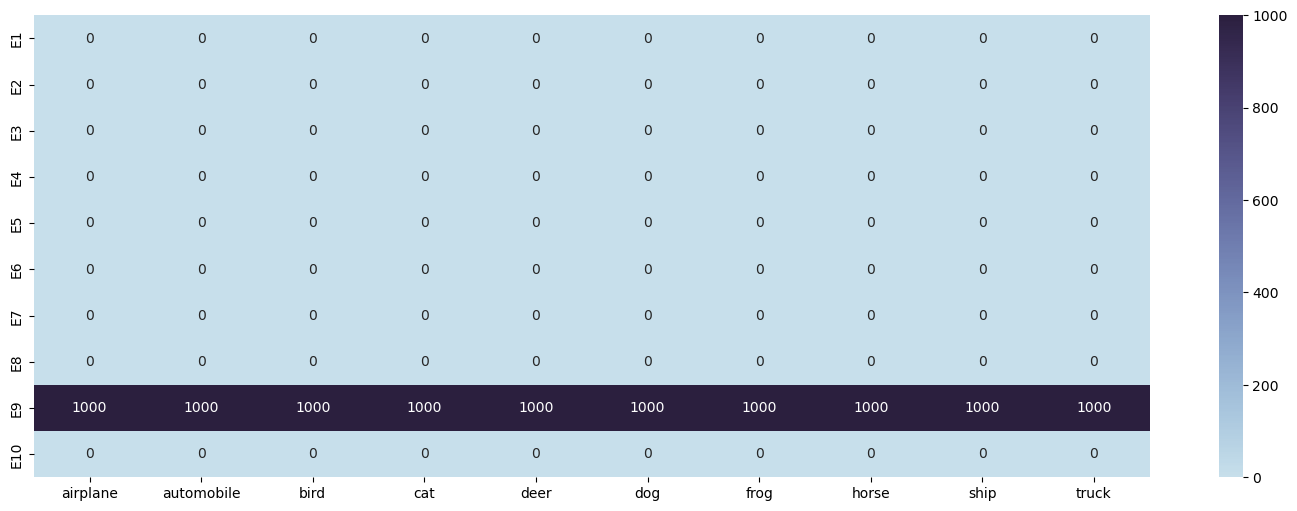

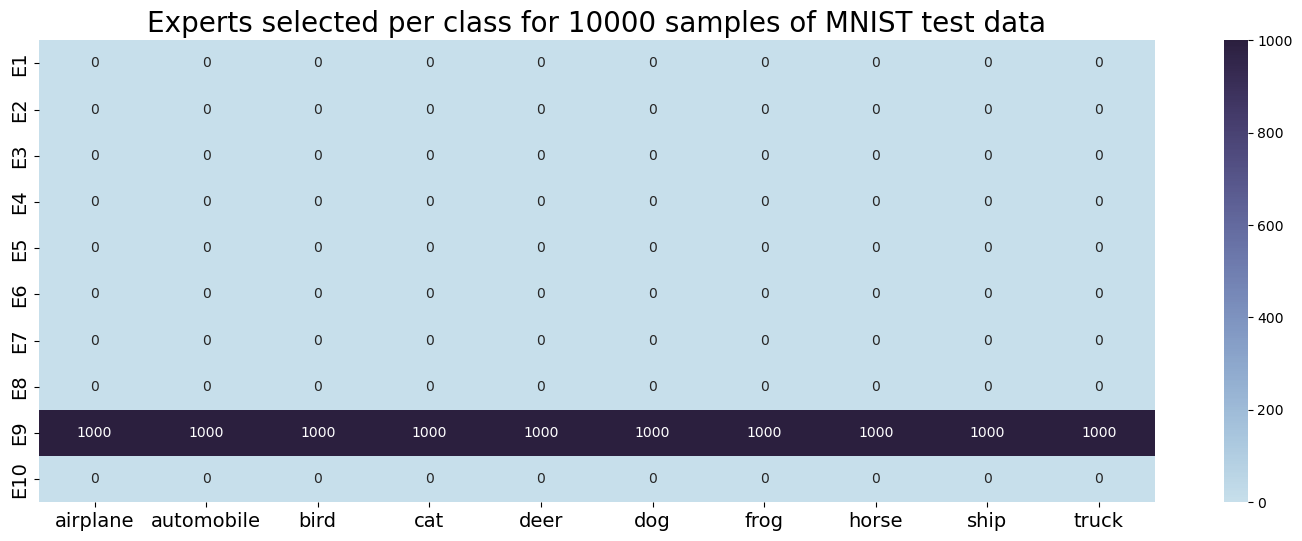

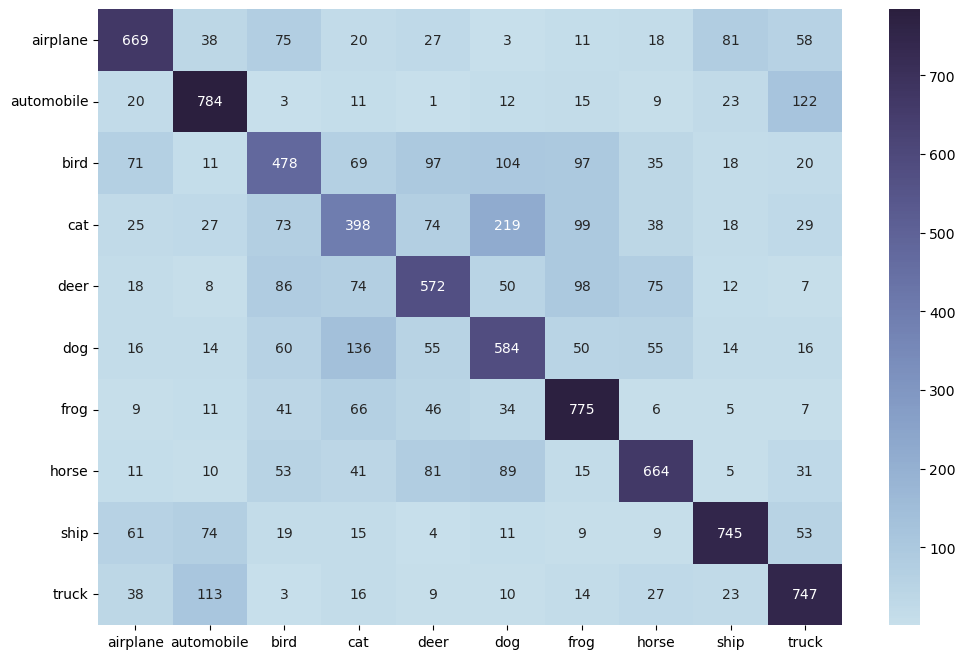

In [25]:
m = 'new_cifar10_with_attention_rand_init_top_1'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.072
Max Validation Accuracy 0.822
Min Validation Error 0.178
Mutual Information 2.218
Sample Entropy 0.062
Expert Usage 2.321
Best model index 8
cifar10_with_attention_rand_init_top_2_10_5_models.pt


<Figure size 640x480 with 0 Axes>

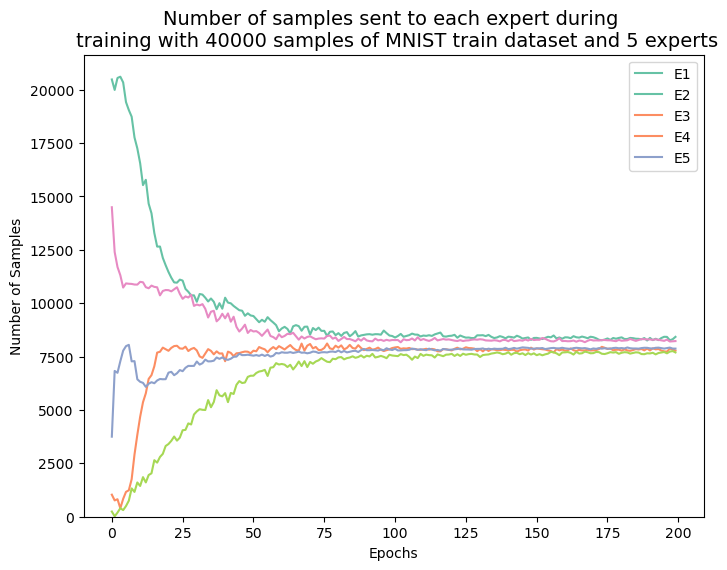

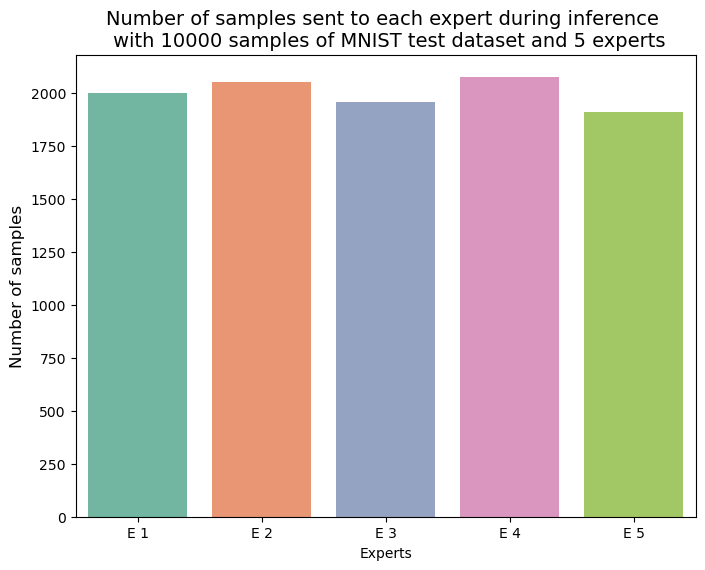

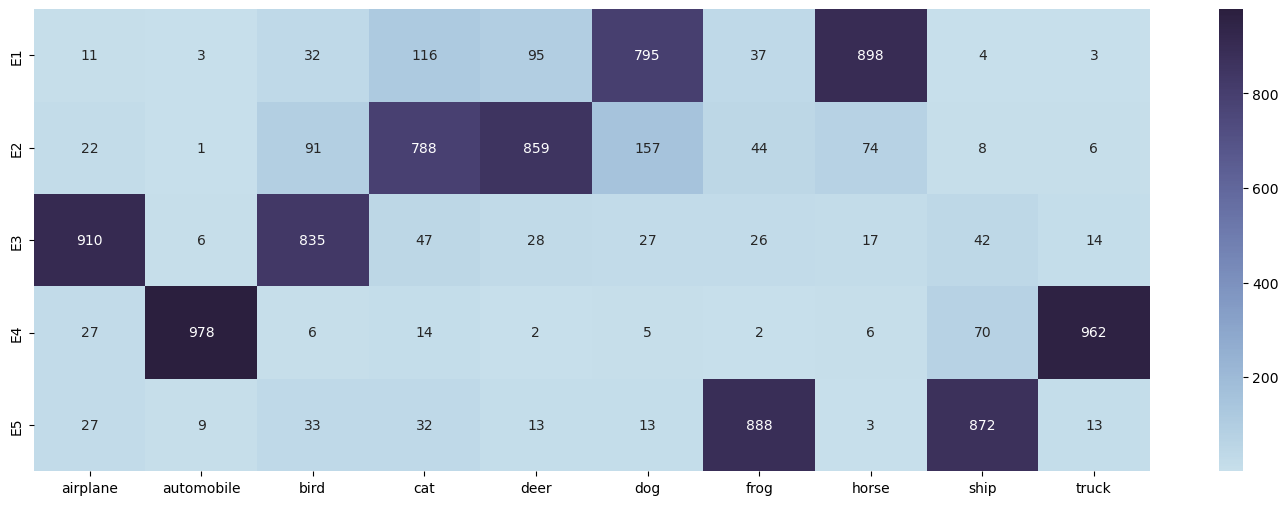

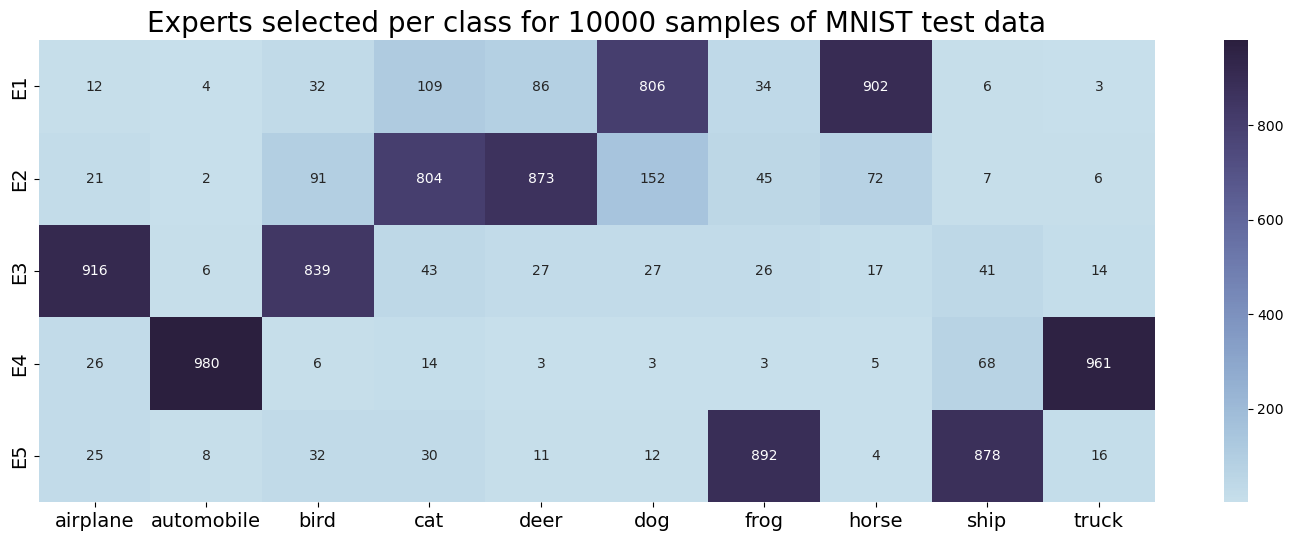

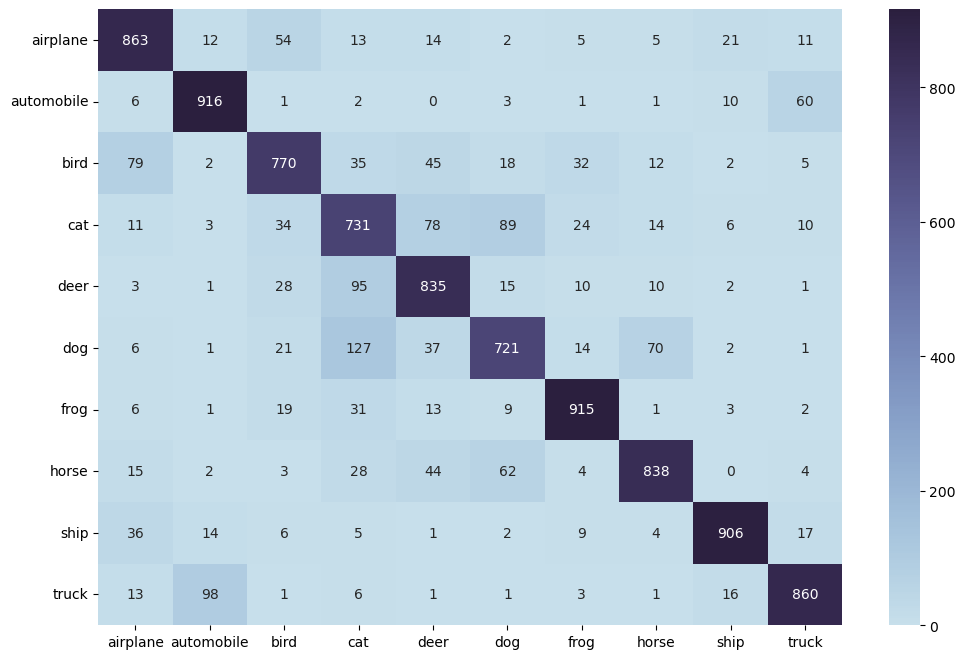

In [18]:
m = 'cifar10_with_attention_rand_init_top_2'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.072
Max Validation Accuracy 0.817
Min Validation Error 0.183
Mutual Information 2.176
Sample Entropy 0.027
Expert Usage 2.285
Best model index 4
new_cifar10_with_attention_rand_init_top_2_10_5_models.pt


<Figure size 640x480 with 0 Axes>

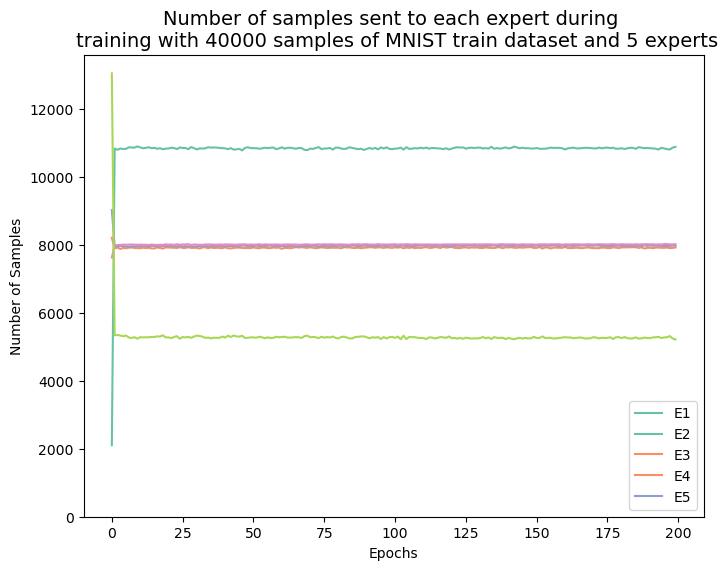

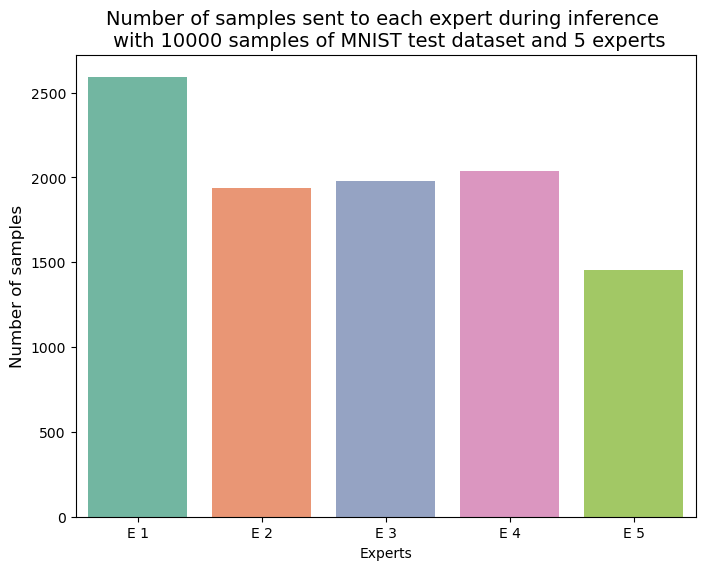

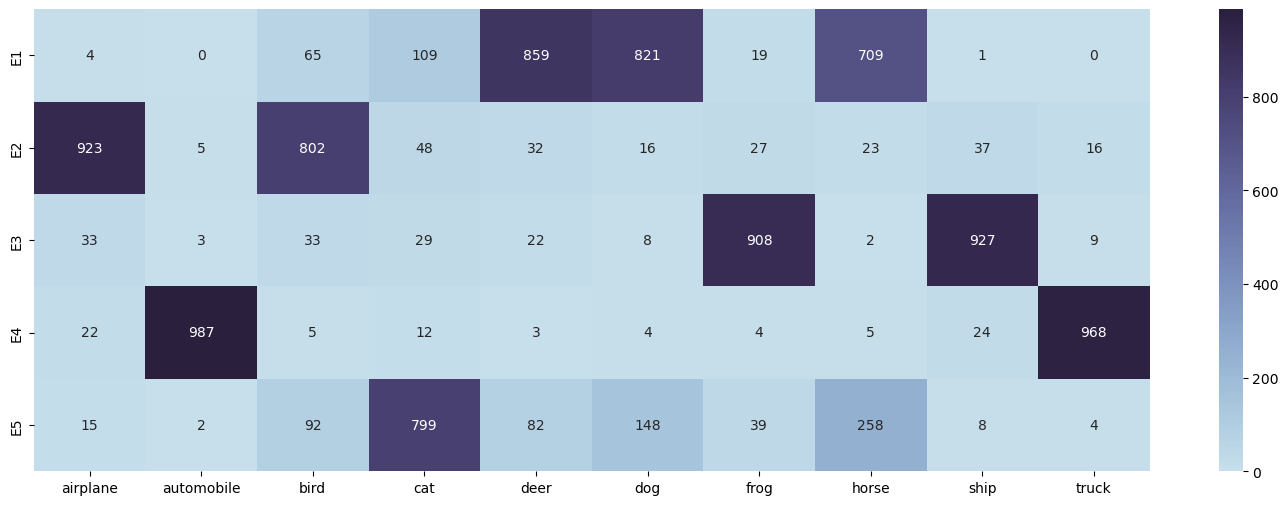

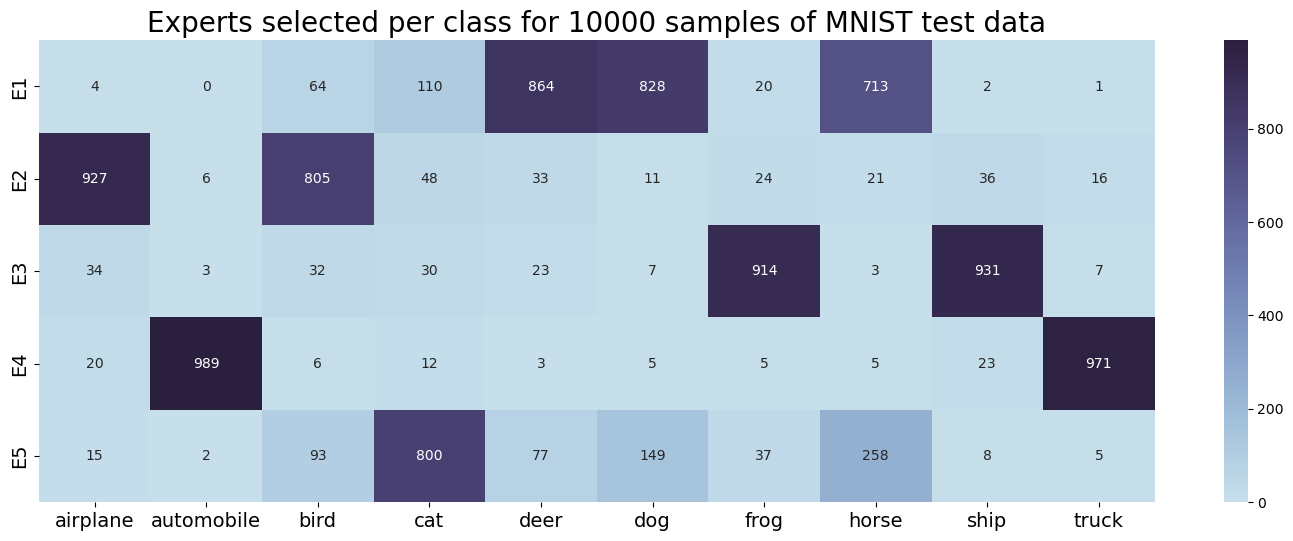

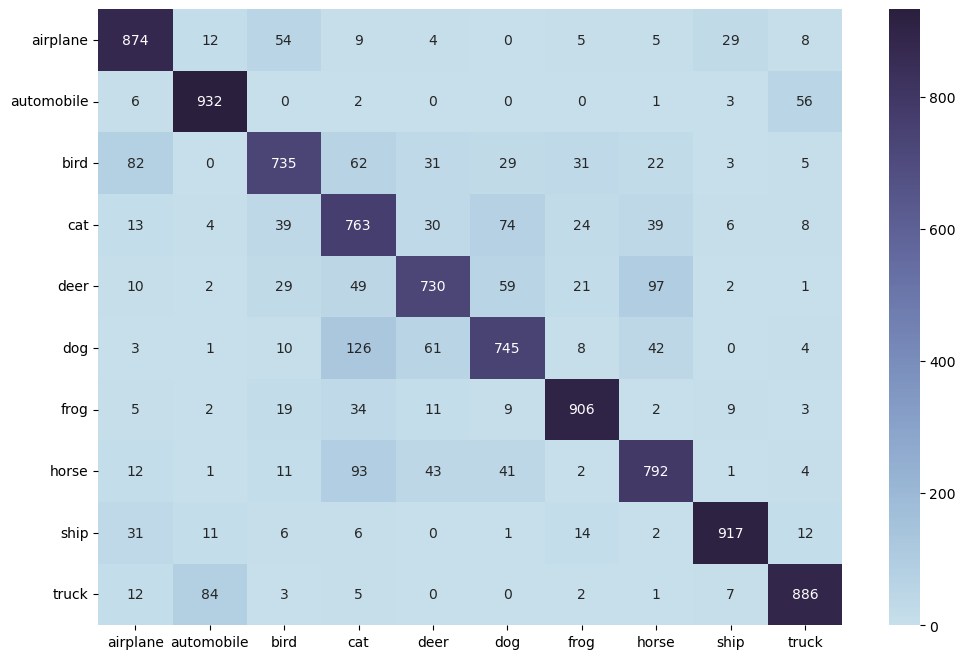

In [26]:
m = 'new_cifar10_with_attention_rand_init_top_2'
total_experts = 5
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)


Train Accuracy 0.031
Max Validation Accuracy 0.854
Min Validation Error 0.146
Mutual Information 2.980
Sample Entropy 0.116
Expert Usage 3.239
Best model index 4
cifar10_with_attention_rand_init_top_2_10_10_models.pt


<Figure size 640x480 with 0 Axes>

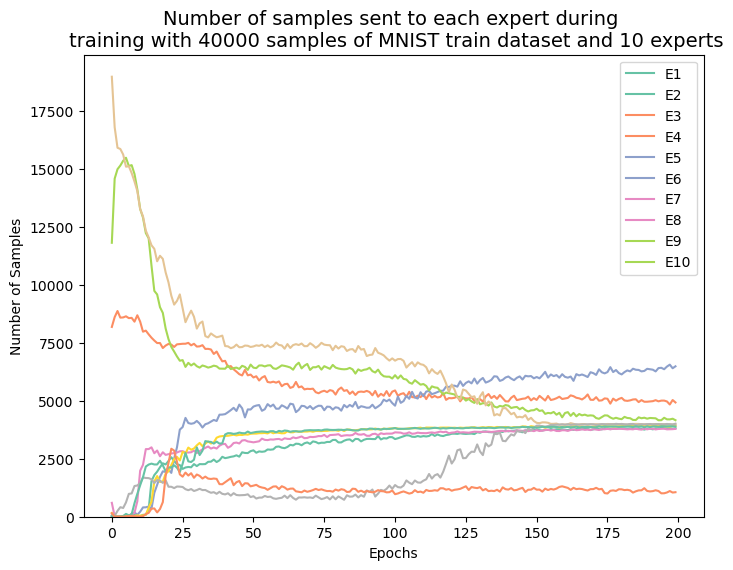

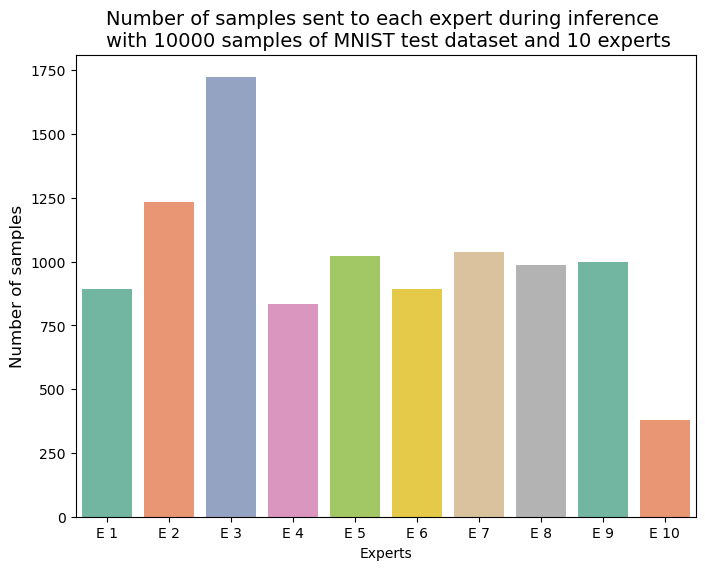

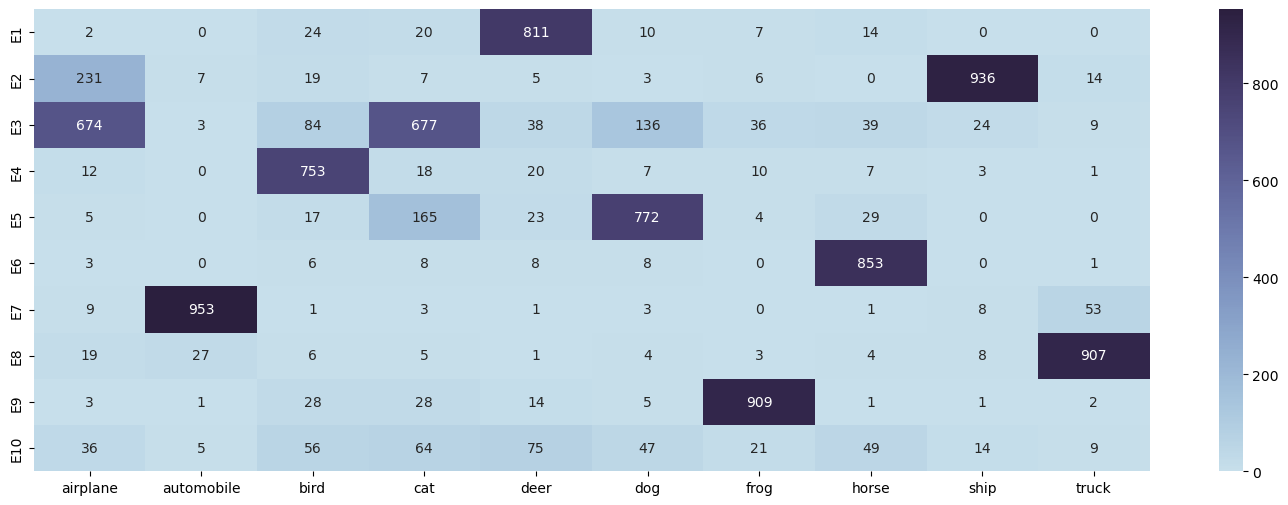

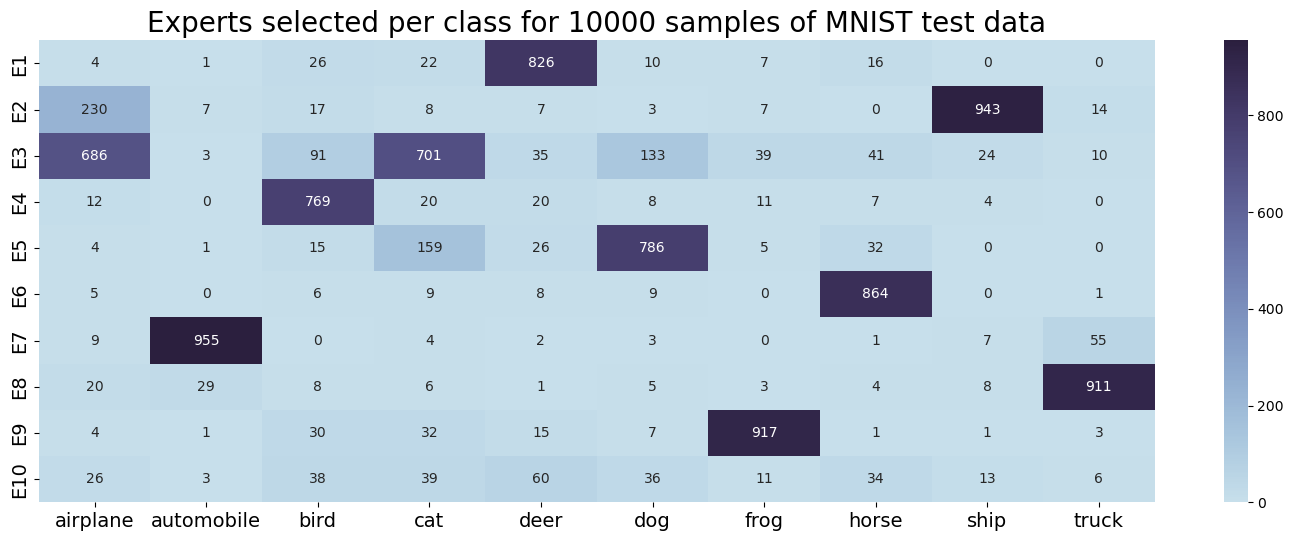

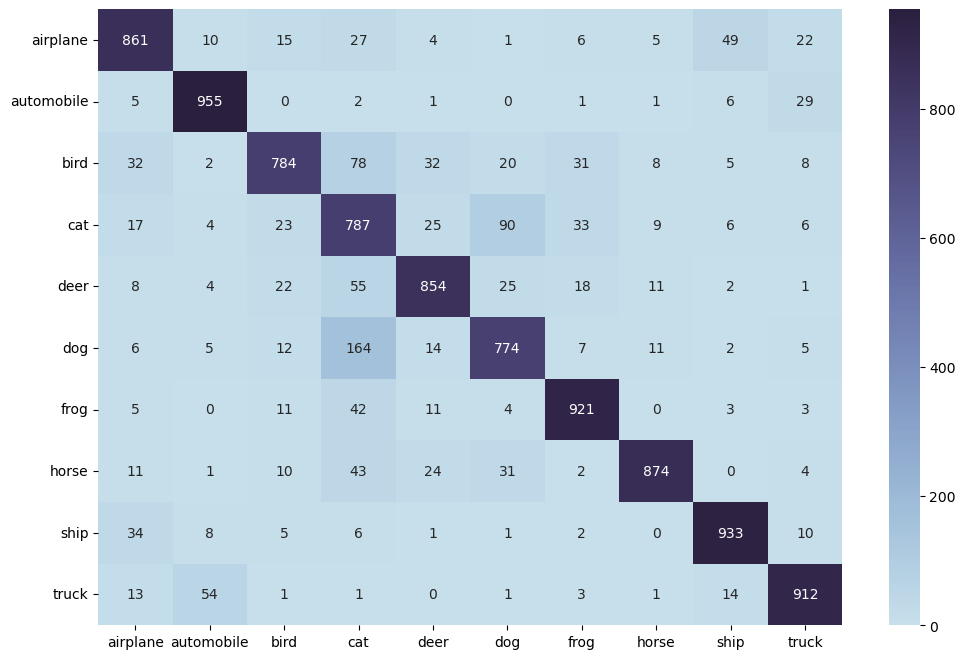

In [24]:
m = 'cifar10_with_attention_rand_init_top_2'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)

Train Accuracy 0.071
Max Validation Accuracy 0.819
Min Validation Error 0.181
Mutual Information 2.740
Sample Entropy 0.068
Expert Usage 3.149
Best model index 1
new_cifar10_with_attention_rand_init_top_2_10_10_models.pt


<Figure size 640x480 with 0 Axes>

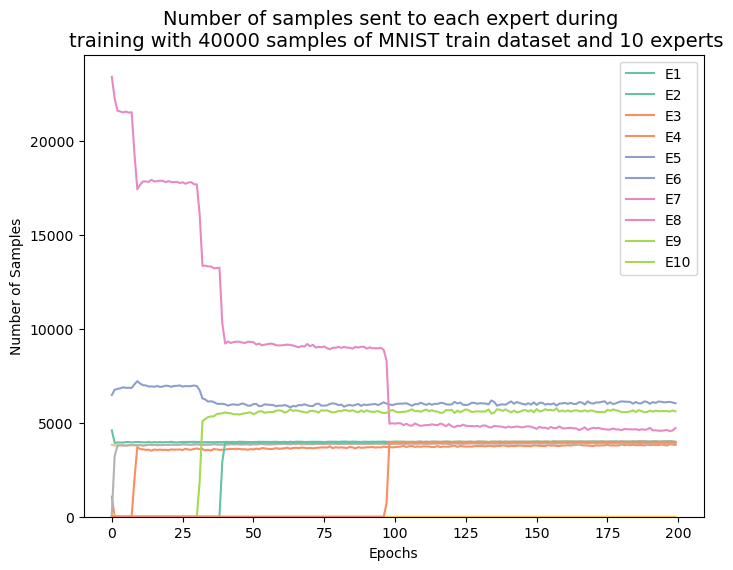

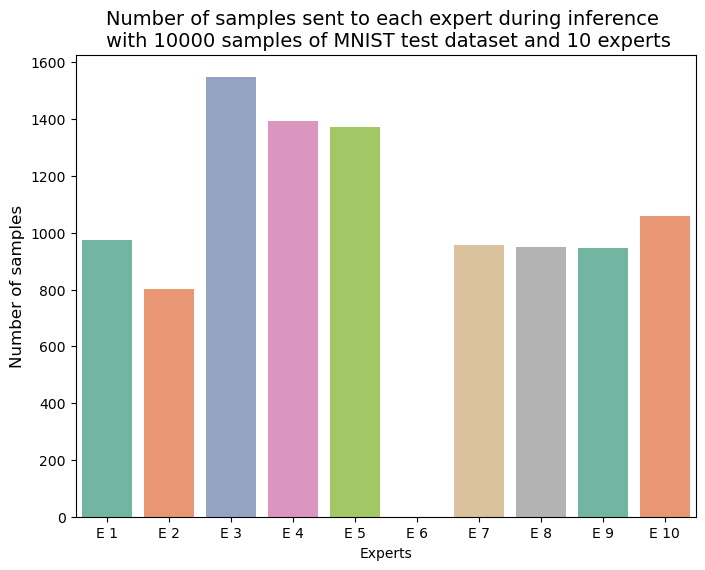

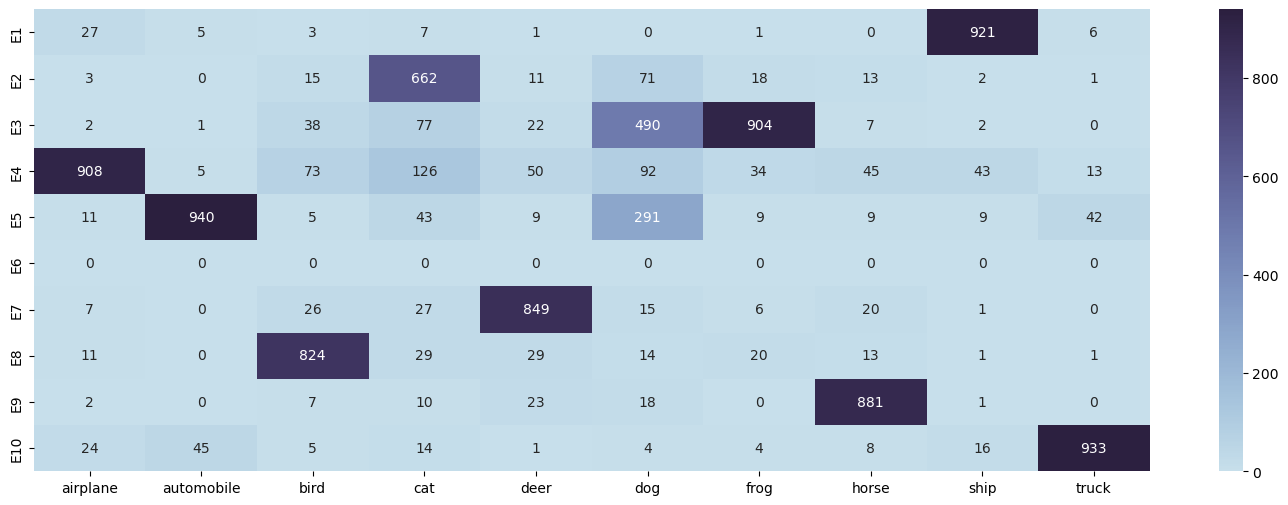

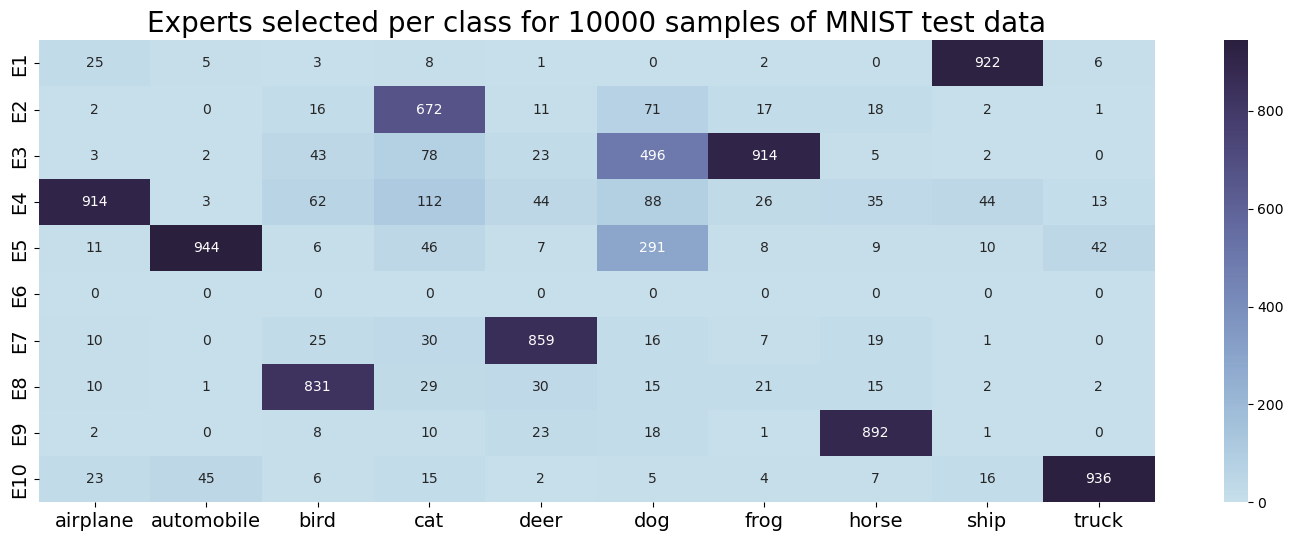

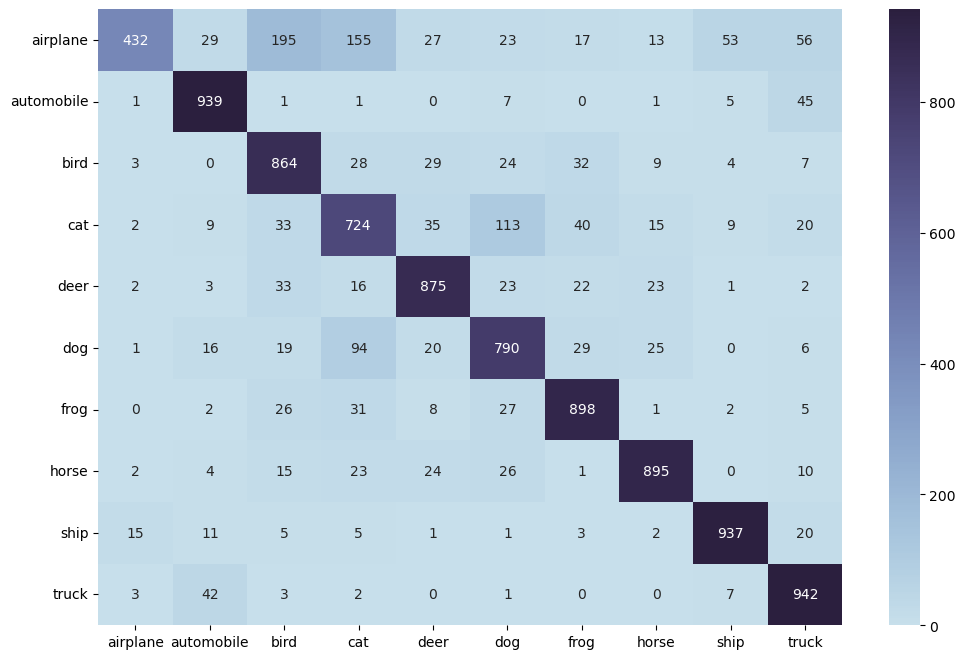

In [27]:
m = 'new_cifar10_with_attention_rand_init_top_2'
total_experts = 10
num_classes = 10
classes = classes_cifar10
num_epochs = 200

w_importance_range = [0.0]                           

test_loader = cifar10_testloader

plot_expert_usage(m, test_loader=test_loader, w_importance_range=w_importance_range,
                  total_experts=total_experts,num_classes=num_classes,
                 classes=classes, num_epochs=num_epochs, fig_path=fig_path, model_path=model_path, device=device)
